# NETW 1013 Clustering Project 

**Objective:** 
The objective of this project is to teach students how to apply clustering to real datasets.

You should be able to answer the following questions and provide reasonable justification for your answers: 
* Which clustering approach have you decided to use on each dataset? 
* Compare between Kmeans, Hierarchal and DBScan.
* Discuss how you tuned your clustering hyperparameters to achieve the best cluster assignment?
* What is the effect of different distance functions on the calculated clusters?
* How did you evaluate the performance of different clustering techniques on different datatsets?
* Visualize your output where applicable.
* What is the effect of scaling on the performance of clustering techniques? 

 
 



Running this project requires the following imports:

In [34]:
import warnings
!pip install plotnine
import matplotlib.cm as cm  # Import the colormap module
warnings.filterwarnings('ignore')
import seaborn as sns 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn.preprocessing as prep
from sklearn.datasets import make_blobs
from plotnine import *   
# StandardScaler is a function to normalize the data 
# You may also check MinMaxScaler and MaxAbsScaler 
#from sklearn.preprocessing import StandardScaler

from sklearn.cluster import DBSCAN


from sklearn.cluster import KMeans

from sklearn.metrics import silhouette_score

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))
%matplotlib inline

from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
# Please refer to the sklearn documentation to learn more about the different parameters for each clustering technique.

Defaulting to user installation because normal site-packages is not writeable


DEPRECATION: Loading egg at c:\programdata\anaconda3\lib\site-packages\vboxapi-1.0-py3.12.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330


In [35]:
# helper function that allows us to display data in 2 dimensions an highlights the clusters
def display_cluster(X,km=[],num_clusters=0):
    color = ['b', 'r', 'g', 'c', 'm', 'y', 'k', 
         'orange', 'purple', 'navy']  # Added three more colors

    alpha = 0.5  
    s = 20
    if num_clusters == 0:
        plt.scatter(X[:,0],X[:,1],c = color[0],alpha = alpha,s = s)
    else:
        for i in range(num_clusters):
            plt.scatter(X[km.labels_==i,0],X[km.labels_==i,1],c = color[i],alpha = alpha,s=s)
            plt.scatter(km.cluster_centers_[i][0],km.cluster_centers_[i][1],c = color[i], marker = 'x', s = 100)

## Multi Blob Data Set 
* The dataset generated below is known to be best clustered into 6 clusters.
* Cluster the data set below using the three different clustering techniques discussed in the course.
* Visualize your clustering output in each step of your work.



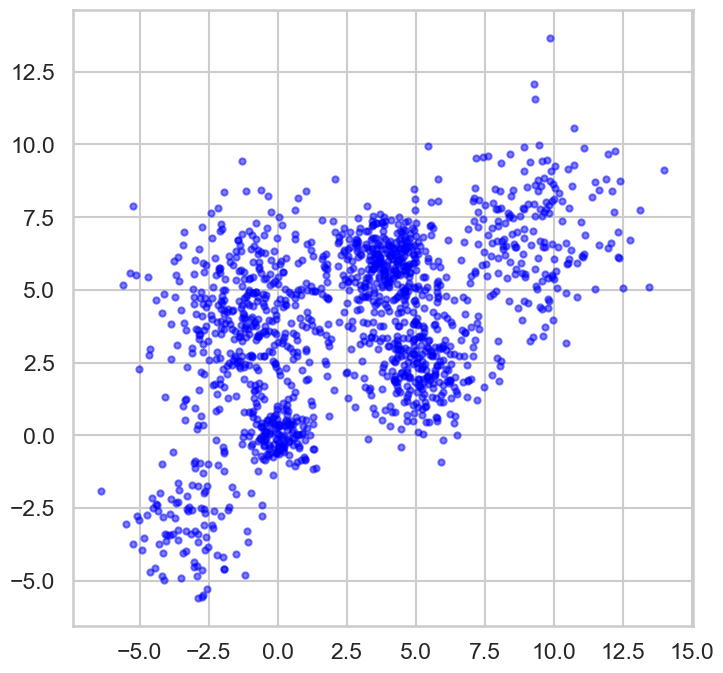

In [37]:
#Data Generation and Visualization
plt.rcParams['figure.figsize'] = [8,8]
sns.set_style("whitegrid")
sns.set_context("talk")

n_bins = 6  
centers = [(-3, -3), (0, 0), (5,2.5),(-1, 4), (4, 6), (9,7)]
Multi_blob_Data, y = make_blobs(n_samples=[100,150, 300, 400,300, 200], n_features=2, cluster_std=[1.3,0.6, 1.2, 1.7,0.9,1.7],
                  centers=centers, shuffle=False, random_state=42)
display_cluster(Multi_blob_Data)

### Kmeans 
* Use Kmeans with different values of K to cluster the above data. 
* Display the outcome of each value of K. 
* Plot distortion function versus K and choose the approriate value of K. 
* Plot the silhouette_score versus K and use it to choose the best K. 
* Store the silhouette_score for the best K for later comparison with other clustering techniques. 
* Comment on the effect of centroid initialization on cluster assignment. 
* Hint: Lookup k-means++ .

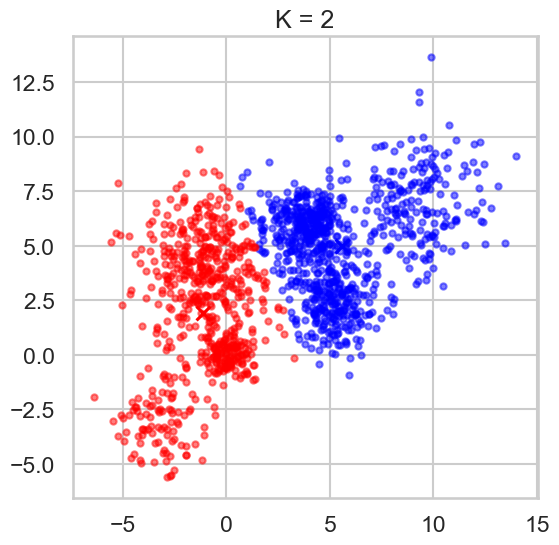

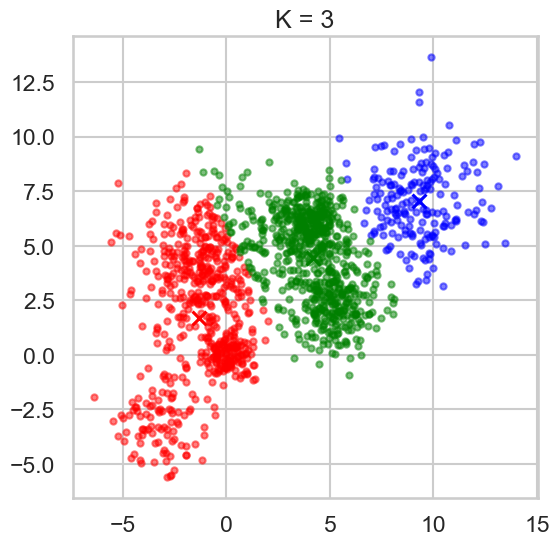

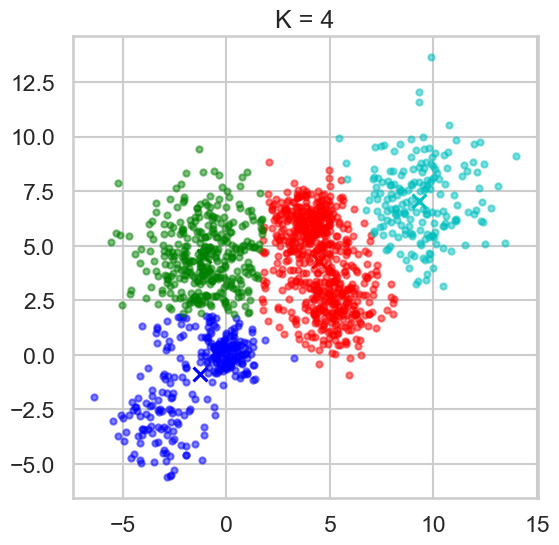

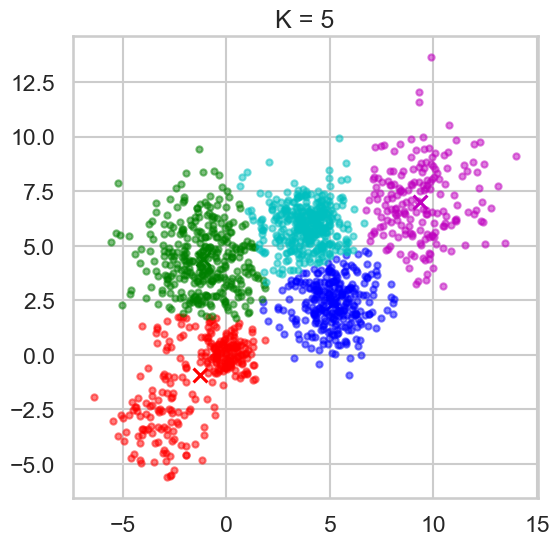

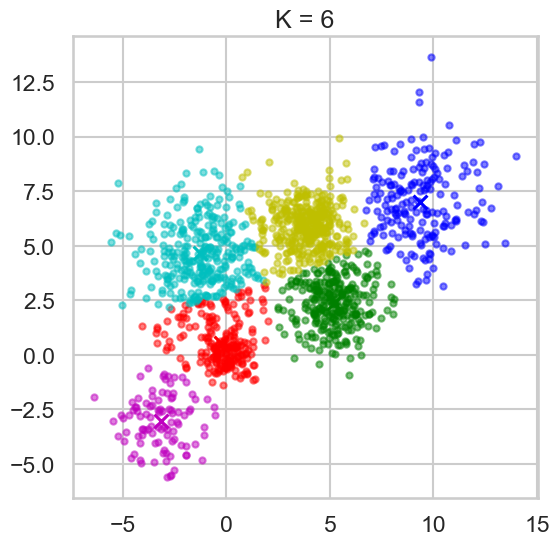

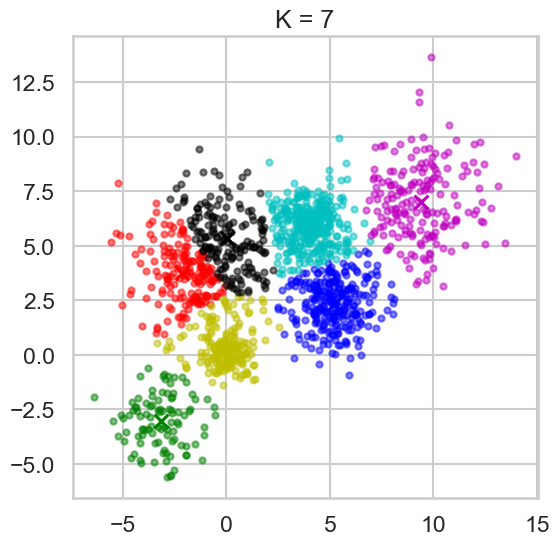

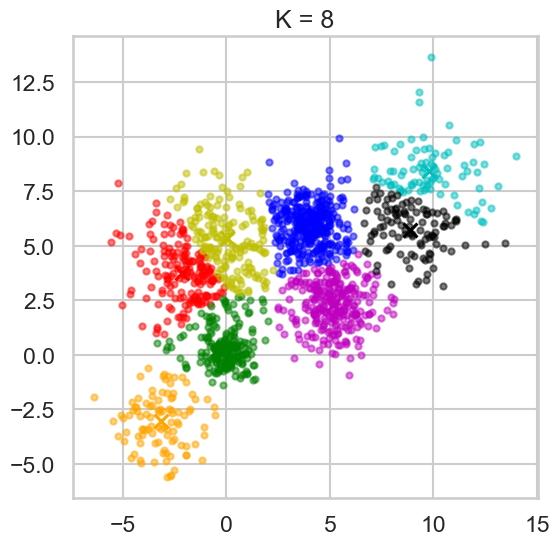

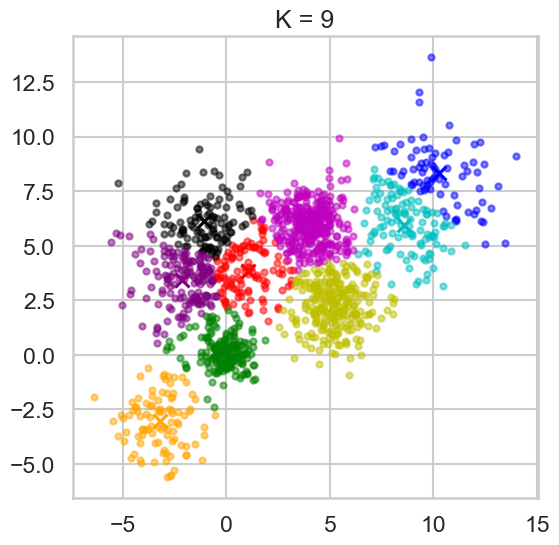

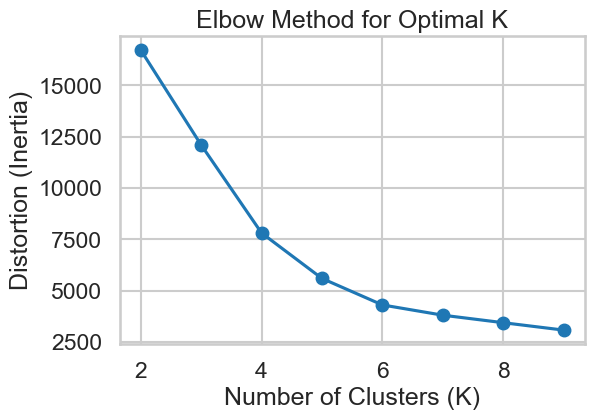

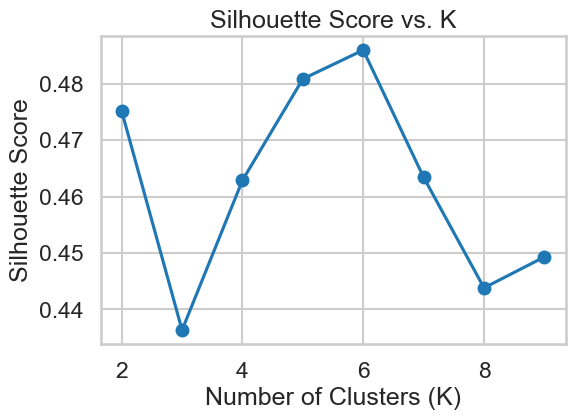

The best K is 6 with a silhouette score of 0.4860

Effect of Centroid Initialization:
Using 'k-means++' improves centroid selection by placing them far apart initially,
which leads to faster convergence and more stable clustering results.


In [39]:
# Function to perform KMeans clustering and evaluation
def evaluate_kmeans(X, K_values=range(2, 10)):
    distortions = []
    silhouette_scores = {}

    for K in K_values:
        km = KMeans(n_clusters=K, init='k-means++', n_init=10, random_state=42)
        km.fit(X)

        distortions.append(km.inertia_)  # Store inertia (distortion function)
        score = silhouette_score(X, km.labels_)
        silhouette_scores[K] = score  # Store silhouette score

        # Display cluster results for each K
        plt.figure(figsize=(6, 6))
        display_cluster(X, km, K)
        plt.title(f'K = {K}')
        plt.show()

    # Plot the distortion function vs. K (Elbow Method)
    plt.figure(figsize=(6, 4))
    plt.plot(K_values, distortions, marker='o', linestyle='-')
    plt.xlabel('Number of Clusters (K)')
    plt.ylabel('Distortion (Inertia)')
    plt.title('Elbow Method for Optimal K')
    plt.show()

    # Plot the silhouette score vs. K
    plt.figure(figsize=(6, 4))
    plt.plot(K_values, list(silhouette_scores.values()), marker='o', linestyle='-')
    plt.xlabel('Number of Clusters (K)')
    plt.ylabel('Silhouette Score')
    plt.title('Silhouette Score vs. K')
    plt.show()

    # Store the best K based on silhouette score
    best_K = max(silhouette_scores, key=silhouette_scores.get)
    best_score = silhouette_scores[best_K]
    print(f"The best K is {best_K} with a silhouette score of {best_score:.4f}")

    # Comment on centroid initialization
    print("\nEffect of Centroid Initialization:")
    print("Using 'k-means++' improves centroid selection by placing them far apart initially,")
    print("which leads to faster convergence and more stable clustering results.")

    return best_K, best_score  # Return best K and silhouette score for later use

# Run evaluation function
best_K, best_silhouette_score = evaluate_kmeans(Multi_blob_Data)

**As shown here that K = 6 is the best choice because the distortion decreases rapidly until K = 6, but after that the improvement is minimal. This means adding more clusters does not significantly improve the clustering quality. Also that the highest siloutte score recorded was using k=6 meaning that using k=6 indicates well-separated and defined clusters.**

**I used KMeans++ because it improves the way initial centroids are selected in K-Means clustering as instead of choosing them randomly it picks the first centroid at random and then selects the rest by ensuring they are far apart from existing centroids and this helps the algorithm to converge faster and gives better stable results**

### Hierarchal Clustering
* Use AgglomerativeClustering function to  to cluster the above data.
* In the  AgglomerativeClustering change the following parameters:
    * Affinity (use euclidean, manhattan and cosine)
    * Linkage(try different options)
    * Distance_threshold (try different options)
* Plot the dendrograph for one trial.
* For each of these trials, calculate the silhouette_score and display the resulting clusters.  
* Find the set of paramters that would find result in the best silhouette_score and store this score for later comparison with other clustering techniques. 
* Record your observation.

Metric: euclidean, Linkage: complete, Distance Threshold: 2, Silhouette Score: 0.2927


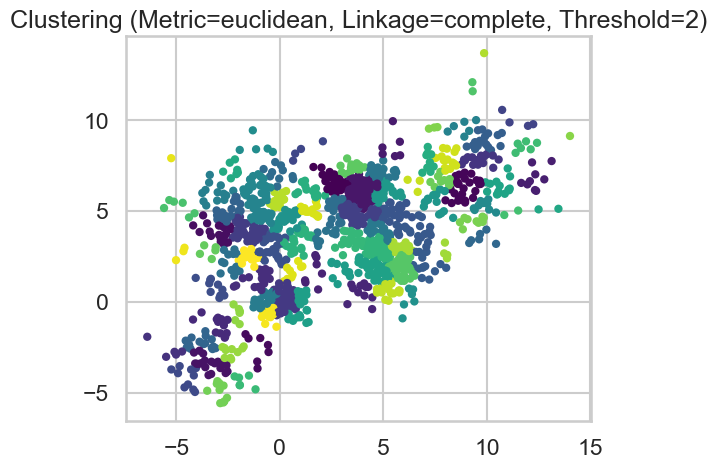

Metric: euclidean, Linkage: complete, Distance Threshold: 3, Silhouette Score: 0.2896


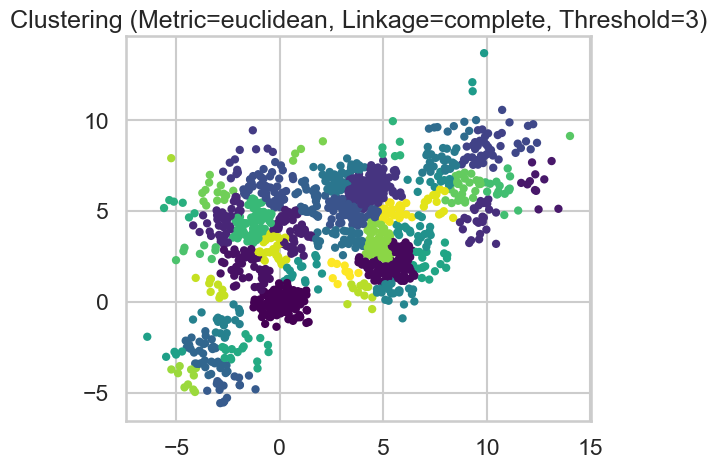

Metric: euclidean, Linkage: complete, Distance Threshold: 4, Silhouette Score: 0.2870


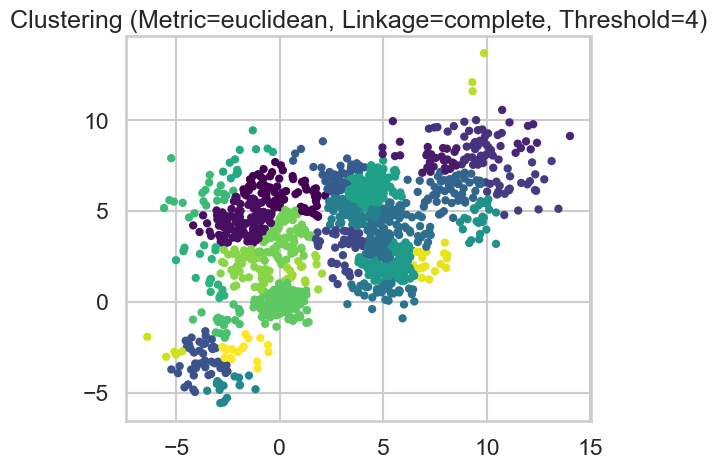

Metric: euclidean, Linkage: complete, Distance Threshold: 5, Silhouette Score: 0.3046


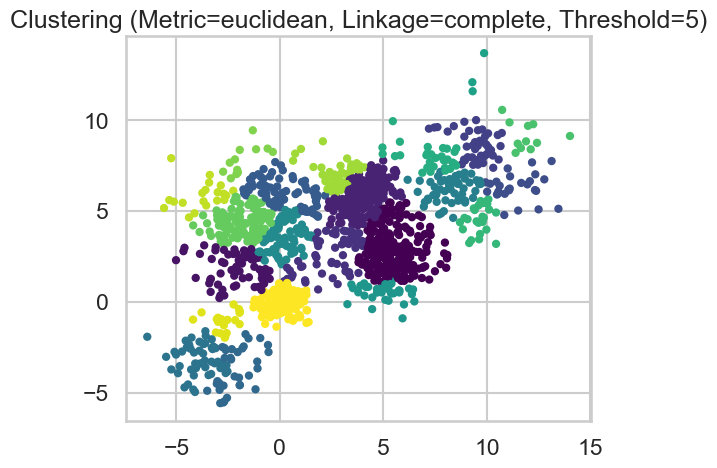

Metric: euclidean, Linkage: average, Distance Threshold: 2, Silhouette Score: 0.3156


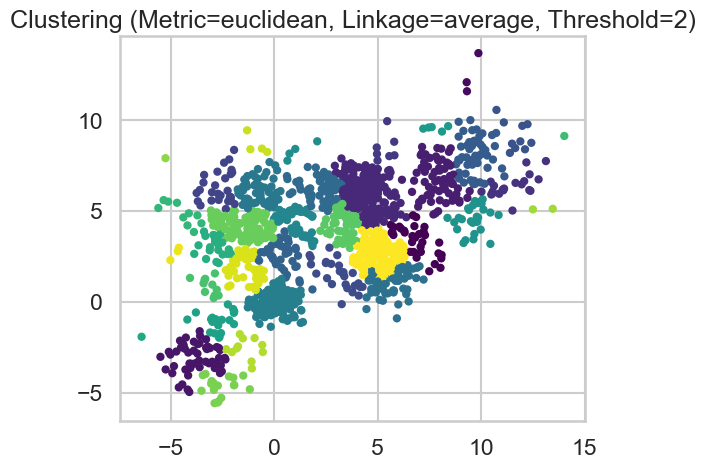

Metric: euclidean, Linkage: average, Distance Threshold: 3, Silhouette Score: 0.3550


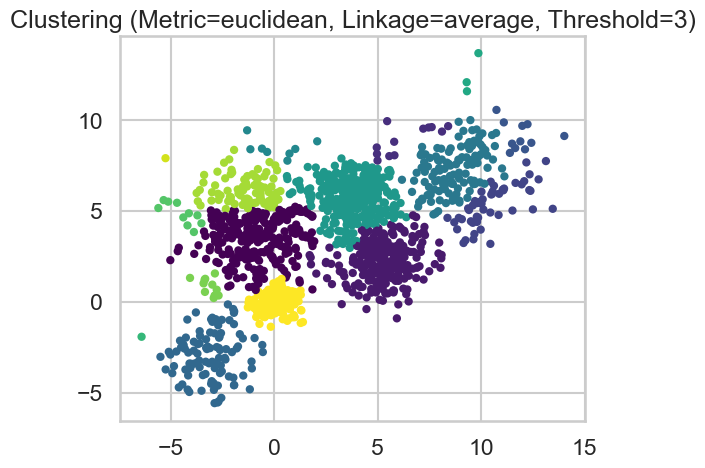

Metric: euclidean, Linkage: average, Distance Threshold: 4, Silhouette Score: 0.3738


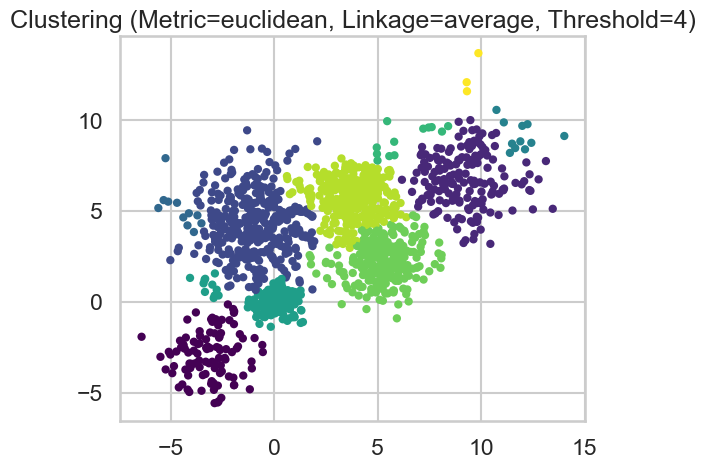

Metric: euclidean, Linkage: average, Distance Threshold: 5, Silhouette Score: 0.4332


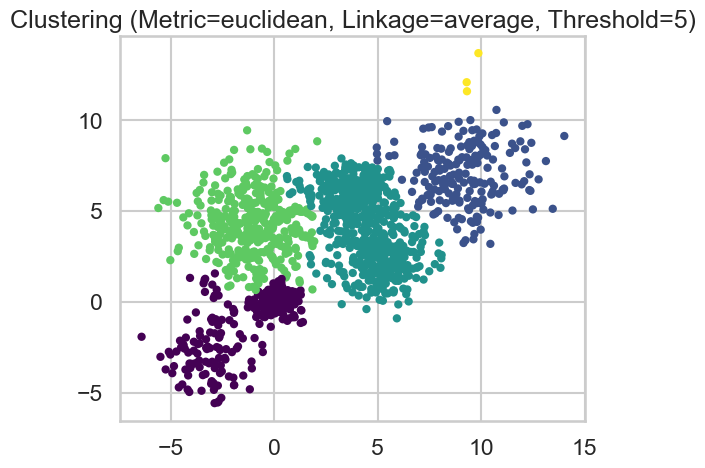

Metric: euclidean, Linkage: single, Distance Threshold: 2, Silhouette Score: 0.3218


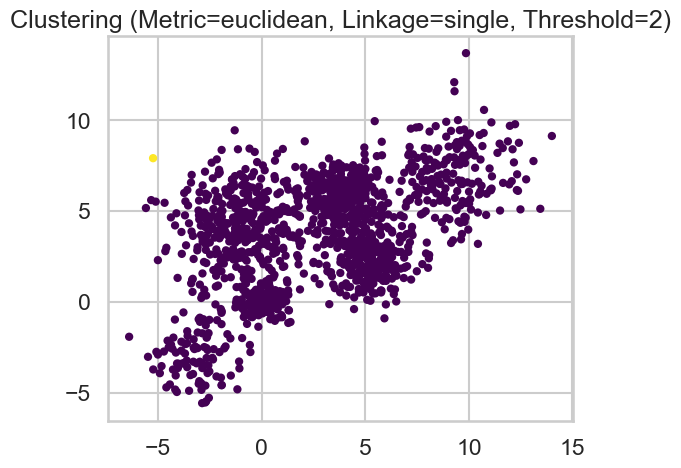

Skipped combination: Metric=euclidean, Linkage=single, Error: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)
Skipped combination: Metric=euclidean, Linkage=single, Error: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)
Skipped combination: Metric=euclidean, Linkage=single, Error: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)
Metric: manhattan, Linkage: complete, Distance Threshold: 2, Silhouette Score: 0.3229


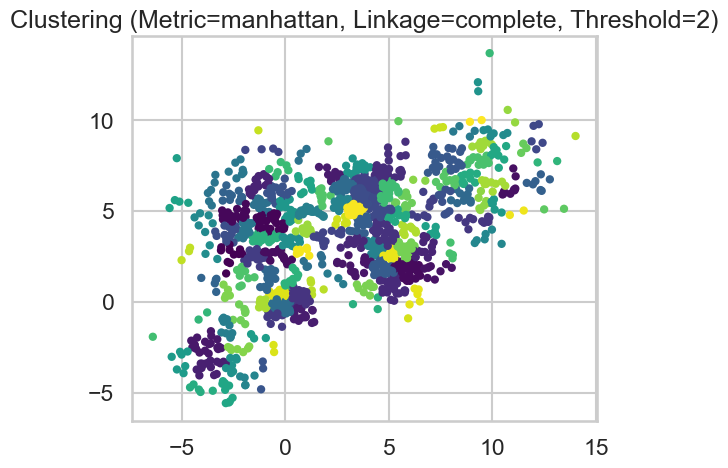

Metric: manhattan, Linkage: complete, Distance Threshold: 3, Silhouette Score: 0.2639


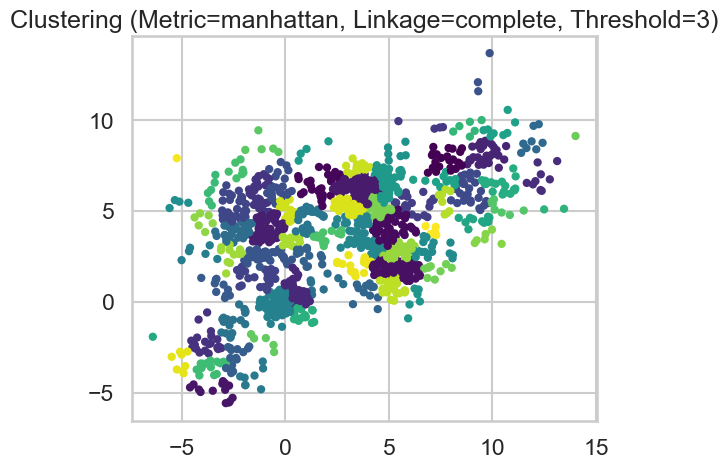

Metric: manhattan, Linkage: complete, Distance Threshold: 4, Silhouette Score: 0.2763


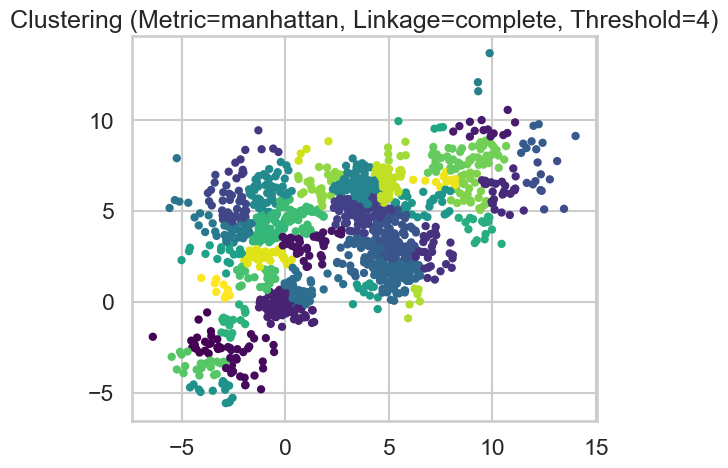

Metric: manhattan, Linkage: complete, Distance Threshold: 5, Silhouette Score: 0.2814


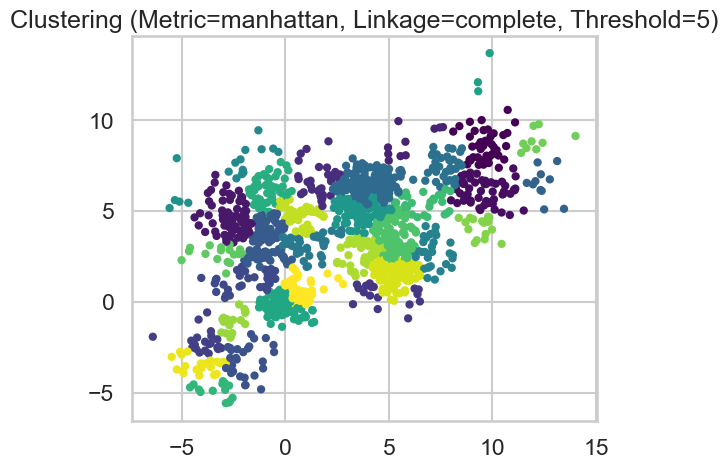

Metric: manhattan, Linkage: average, Distance Threshold: 2, Silhouette Score: 0.2781


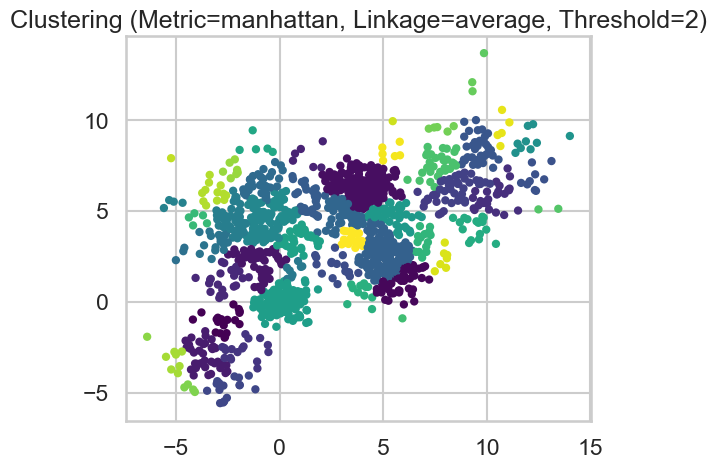

Metric: manhattan, Linkage: average, Distance Threshold: 3, Silhouette Score: 0.2962


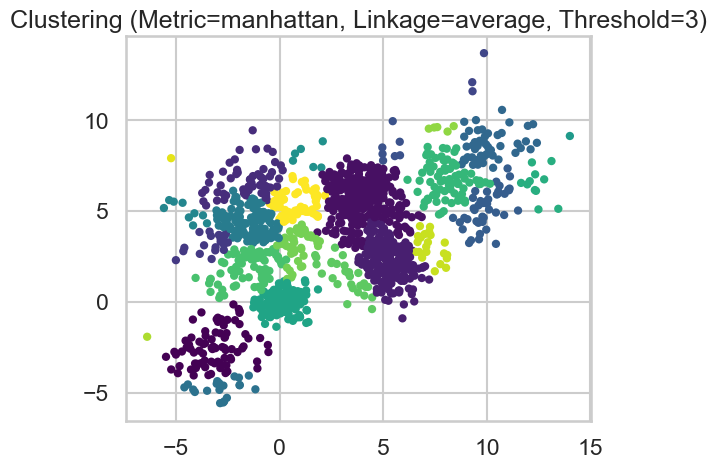

Metric: manhattan, Linkage: average, Distance Threshold: 4, Silhouette Score: 0.3332


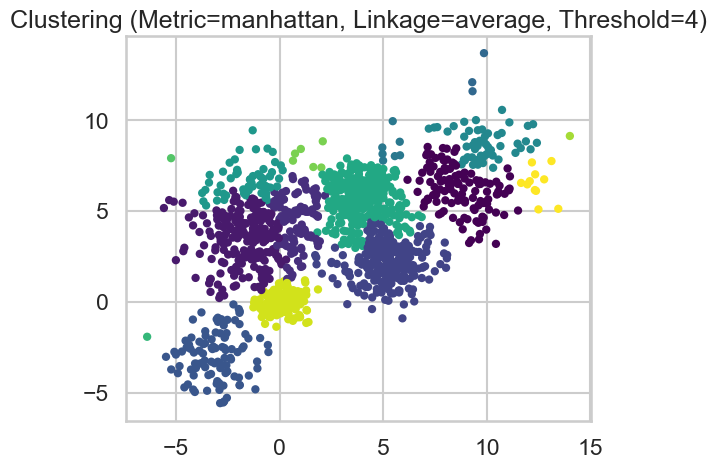

Metric: manhattan, Linkage: average, Distance Threshold: 5, Silhouette Score: 0.3996


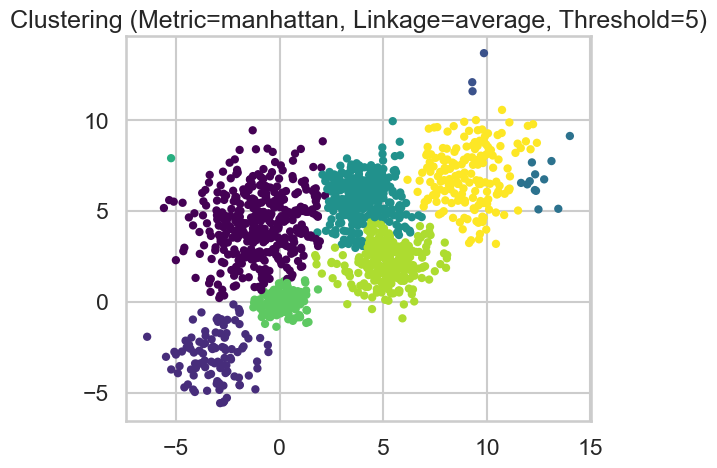

Metric: manhattan, Linkage: single, Distance Threshold: 2, Silhouette Score: 0.1487


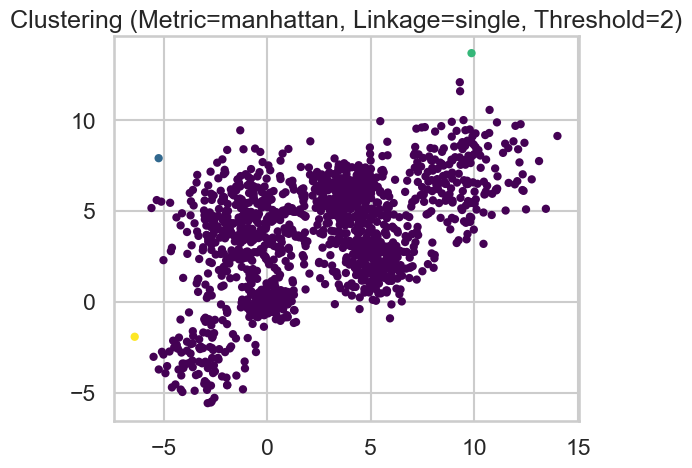

Skipped combination: Metric=manhattan, Linkage=single, Error: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)
Skipped combination: Metric=manhattan, Linkage=single, Error: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)
Skipped combination: Metric=manhattan, Linkage=single, Error: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)
Skipped combination: Metric=cosine, Linkage=complete, Error: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)
Skipped combination: Metric=cosine, Linkage=complete, Error: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)
Skipped combination: Metric=cosine, Linkage=complete, Error: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)
Skipped combination: Metric=cosine, Linkage=complete, Error: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)
Skipped combination: Metric=cosine, Linkage=average, Error: Number of lab

In [72]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage as scipy_linkage
from scipy.spatial.distance import pdist

# Define clustering parameters
metric_options = ['euclidean', 'manhattan', 'cosine']
linkage_options = ['complete', 'average', 'single']
distance_thresholds = [2, 3, 4, 5]


# Store best results
best_score = -1
best_params = None
best_labels = None

# Iterate over different clustering parameters
for metric in metric_options:
    for linkage_method in linkage_options:
        for dist_threshold in distance_thresholds:
            try:
                # Apply Agglomerative Clustering
                model = AgglomerativeClustering(
                    metric=metric,  # Use metric instead of deprecated affinity
                    linkage=linkage_method,
                    distance_threshold=dist_threshold,
                    n_clusters=None  # Let it determine clusters
                )
                labels = model.fit_predict(Multi_blob_Data)
                sil_score = silhouette_score(Multi_blob_Data, labels)
                
                # Print results for each combination
                print(f"Metric: {metric}, Linkage: {linkage_method}, Distance Threshold: {dist_threshold}, Silhouette Score: {sil_score:.4f}")

                # Track best score
                if sil_score > best_score:
                    best_score = sil_score
                    best_params = (metric, linkage_method, dist_threshold)
                    best_labels = labels

                # Plot clustering result
                plt.figure(figsize=(6, 5))
                plt.scatter(Multi_blob_Data[:, 0], Multi_blob_Data[:, 1], c=labels, cmap='viridis', s=20)
                plt.title(f"Clustering (Metric={metric}, Linkage={linkage_method}, Threshold={dist_threshold})")
                plt.show()

            except Exception as e:
                print(f"Skipped combination: Metric={metric}, Linkage={linkage_method}, Error: {e}")






**Some combinations of distance metrics and linkage methods are not compatible and this is why we have skipped combinations for example, euclidean distance works with all linkage methods but manhattan and cosine may not work with certain options like complete or average so to avoid errors these invalid combinations are skipped ensuring that only valid clustering configurations are tested.**


Best Parameters:
Metric: euclidean, Linkage: average, Distance Threshold: 5, Silhouette Score: 0.4332
Number of Clusters: 5


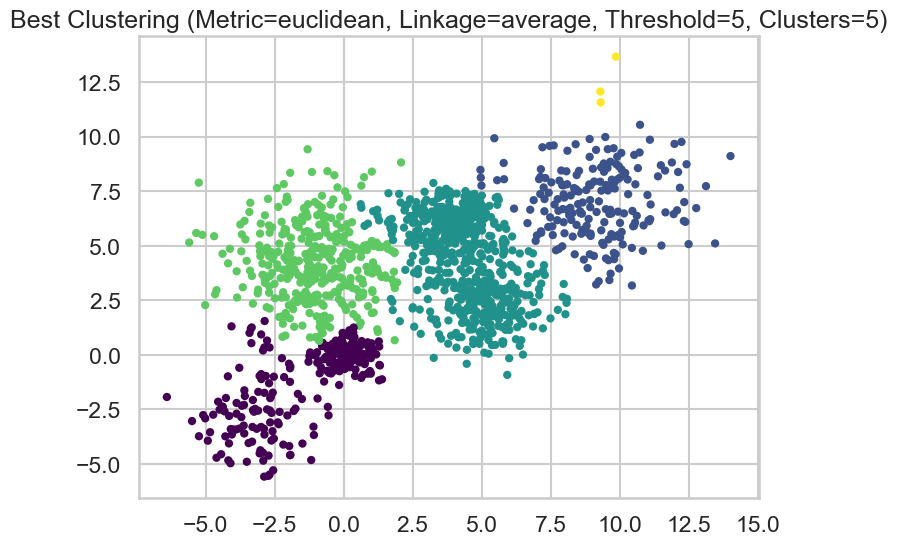

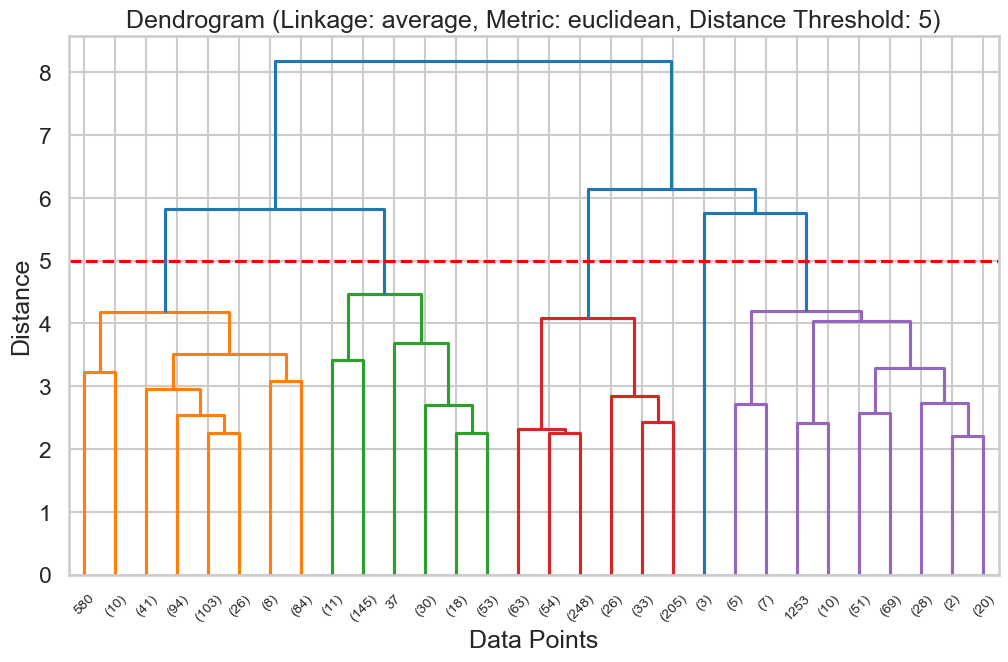

In [73]:
# Display best clustering
if best_params:
    num_clusters = len(set(best_labels))  # Count unique cluster labels
    print("\nBest Parameters:")
    print(f"Metric: {best_params[0]}, Linkage: {best_params[1]}, Distance Threshold: {best_params[2]}, Silhouette Score: {best_score:.4f}")
    print(f"Number of Clusters: {num_clusters}")

    # Plot best clustering
    plt.figure(figsize=(8, 6))
    plt.scatter(Multi_blob_Data[:, 0], Multi_blob_Data[:, 1], c=best_labels, cmap='viridis', s=20)
    plt.title(f"Best Clustering (Metric={best_params[0]}, Linkage={best_params[1]}, Threshold={best_params[2]}, Clusters={num_clusters})")
    plt.show()


    #HERE IS THE PLOT OF THE DENDROGRAM STARTS
    # Function to fix metric names for pdist()
    def fix_metric_name(metric):
        if metric == "manhattan":
           return "cityblock"  
        elif metric == "cosine":
           return "cosine"  
        elif metric == "euclidean":
           return "euclidean"  
        else:
           raise ValueError(f"Unsupported metric: {metric}")  # Handle unexpected cases

    # Fix the metric name
    fixed_metric = fix_metric_name(best_params[0])

    # Compute pairwise distances
    distance_matrix = pdist(Multi_blob_Data, fixed_metric)  # Convert X into a condensed distance matrix

    # Compute linkage using the precomputed distance matrix
    linked = scipy_linkage(distance_matrix, method=best_params[1])  # No metric needed here

    # Plot dendrogram
    plt.figure(figsize=(12, 7))
    plt.title(f"Dendrogram (Linkage: {best_params[1]}, Metric: {best_params[0]}, Distance Threshold: {best_params[2]})")
    plt.xlabel("Data Points")
    plt.ylabel("Distance")

    # Plot dendrogram with color threshold
    dendrogram(linked, color_threshold=best_params[2], truncate_mode='lastp')
    plt.axhline(y=best_params[2], color='red', linestyle='--')  # Threshold line

    plt.show()


else:
    print("\nNo valid clustering was found. Try adjusting distance_threshold values.")


**I found that the best clustering combination parameters are euclidean distance, average linkage, and a distance threshold of 5 giving a silhouette score of 0.4332 and dividing the data into 5 clusters this combination achieved the highest silhouette score among all the options I tested with the agglomerative, however the kmeans clustered the data better than the hierarchal clustering as it achieved the 6 clusters that we was informed with that this datset is best clustered at 6 so kmeeans is better to cluster this dataset than using agglomerative clustering as it acheived the goal and higher silouette score too.**

### DBScan
* Use DBScan function to  to cluster the above data. 
* In the  DBscan change the following parameters: 
    * EPS (from 0.1 to 3)
    * Min_samples (from 5 to 25)
    * Another option: Lookup K-Distance graph method
* Plot the silhouette_score versus the variation in the EPS and the min_samples.
* Plot the resulting Clusters in this case. 
* Find the set of paramters that would find result in the best silhouette_score and store this score for later comparison with other clustering techniques. 
* Record your observations and comments. 

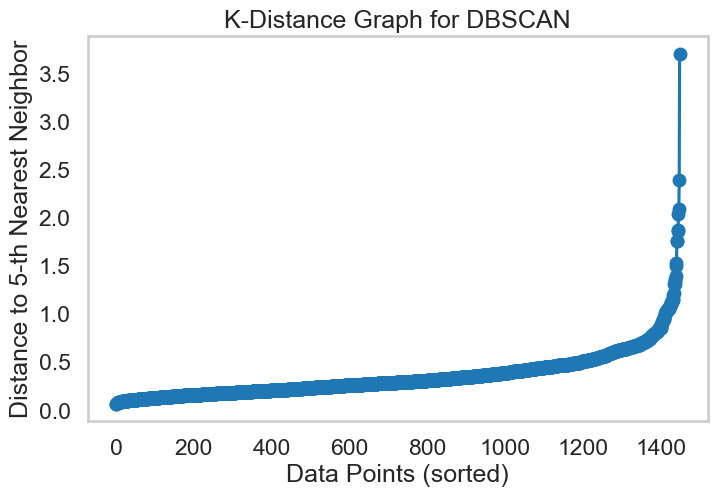

In [78]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors

# Function to plot K-Distance Graph
def plot_k_distance(X, k=5):
    neigh = NearestNeighbors(n_neighbors=k)
    neigh.fit(X)
    distances, _ = neigh.kneighbors(X)

    # Sort distances to the k-th nearest neighbor
    sorted_distances = np.sort(distances[:, -1])  

    # Plot K-Distance Graph
    plt.figure(figsize=(8, 5))
    plt.plot(sorted_distances, marker='o', linestyle='-')
    plt.xlabel("Data Points (sorted)")
    plt.ylabel(f"Distance to {k}-th Nearest Neighbor")
    plt.title("K-Distance Graph for DBSCAN")
    plt.grid()
    plt.show()

# Run this part separately
plot_k_distance(Multi_blob_Data, k=5)



**From this K-Distance Graph I can identify the elbow point where the distance to the 5th nearest neighbor starts increasing sharply this helps me to estimate a good eps value for DBSCAN so based on this graph the elbow here appears around 0.7 - 0.8 so i can by visualising see that the eps should be chosen within this range for best clustering**.  


In [80]:
import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

# Function to Run DBSCAN and Find Best Clustering

def run_dbscan(X, eps_values=np.linspace(0.1, 3, 30), min_samples_values=range(5, 25, 1)):
    best_silhouette = -1
    best_params = None
    best_labels = None
    silhouette_scores = {}
    best_num_clusters = 0

    # Iterate over different EPS and min_samples values
    for eps in eps_values:
        for min_samples in min_samples_values:
            model = DBSCAN(eps=eps, min_samples=min_samples)
            labels = model.fit_predict(X)

            # Ignore cases where only 1 cluster is found
            unique_clusters = set(labels) - {-1}  # Remove noise (-1)
            num_clusters = len(unique_clusters)

            if num_clusters < 2:
                continue  

            # Calculate Silhouette Score
            score = silhouette_score(X, labels)
            silhouette_scores[(eps, min_samples)] = score  

            # Track best parameters
            if score > best_silhouette:
                best_silhouette = score
                best_params = (eps, min_samples)
                best_labels = labels
                best_num_clusters = num_clusters

    print("\nBest Parameters Found:")
    print(f"EPS: {best_params[0]:.2f}, Min Samples: {best_params[1]}, Silhouette Score: {best_silhouette:.4f}")
    print(f"Number of Clusters: {best_num_clusters}")

    return best_params, best_labels, silhouette_scores, best_num_clusters

# Run DBSCAN without plotting all clusters
best_params, best_labels, silhouette_scores, best_num_clusters = run_dbscan(Multi_blob_Data)



Best Parameters Found:
EPS: 0.80, Min Samples: 8, Silhouette Score: 0.3052
Number of Clusters: 2



Final Best Clustering Results:
Best EPS: 0.80
Best Min Samples: 8
Best Number of Clusters: 2
Best Silhouette Score: 0.3052



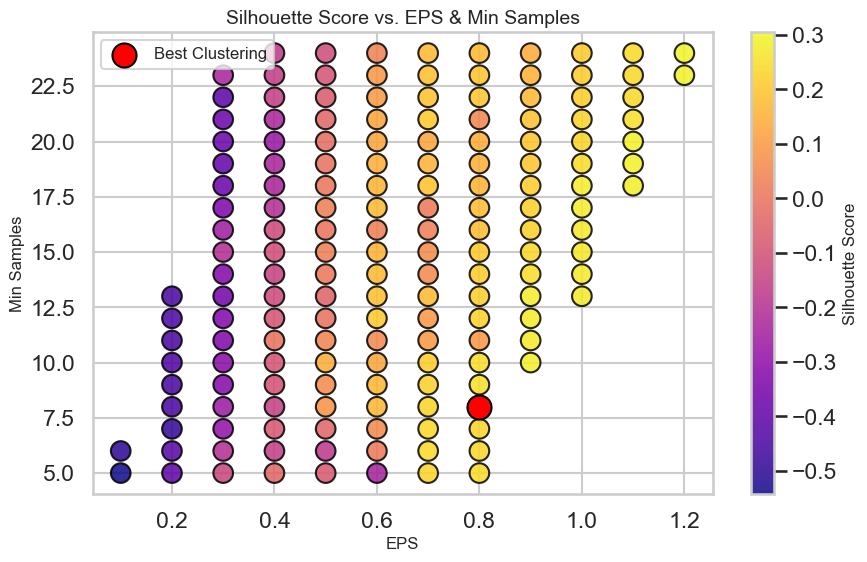

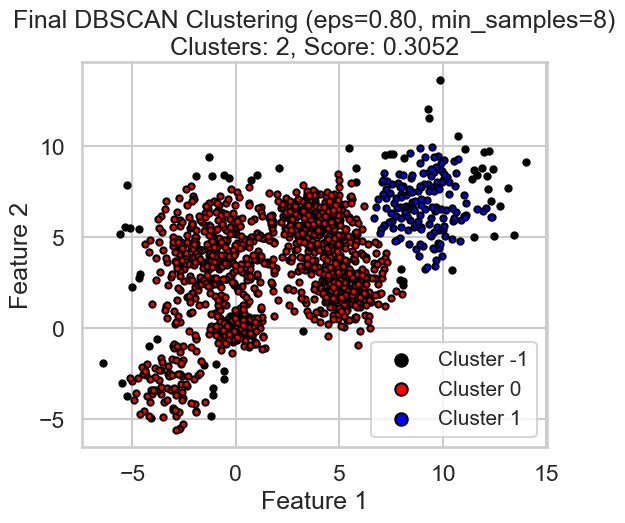

In [81]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Function to Display Best Parameters and Final Clustering Results
def display_best_clustering(X, best_params, best_labels, silhouette_scores, best_num_clusters):
    eps_best, min_samples_best = best_params
    best_silhouette = max(silhouette_scores.values())

    # Display Best Clustering Parameters
    print("\nFinal Best Clustering Results:")
    print(f"Best EPS: {eps_best:.2f}")
    print(f"Best Min Samples: {min_samples_best}")
    print(f"Best Number of Clusters: {best_num_clusters}")
    print(f"Best Silhouette Score: {best_silhouette:.4f}\n")

    # Convert silhouette_scores to DataFrame
    df = pd.DataFrame(list(silhouette_scores.items()), columns=["Params", "Silhouette Score"])
    df[["EPS", "Min Samples"]] = pd.DataFrame(df["Params"].tolist(), index=df.index)
    df.drop(columns=["Params"], inplace=True)

    # ---- 2D Scatter Plot with Color Gradient ----
    plt.figure(figsize=(10, 6))
    scatter = plt.scatter(df["EPS"], df["Min Samples"], c=df["Silhouette Score"], cmap="plasma", 
                          s=200, alpha=0.85, edgecolors="k")

    # Highlight best clustering point
    plt.scatter(eps_best, min_samples_best, color="red", s=300, edgecolors="black", label="Best Clustering")

    plt.xlabel("EPS", fontsize=12)
    plt.ylabel("Min Samples", fontsize=12)
    plt.title("Silhouette Score vs. EPS & Min Samples", fontsize=14)
    
    # Add color bar
    cbar = plt.colorbar(scatter)
    cbar.set_label("Silhouette Score", fontsize=12)

    plt.legend(loc="best", fontsize=12)
    plt.grid(True)
    plt.show()

    # ---- Final Clustering Plot ----
    plt.figure(figsize=(6, 5))
    unique_labels = np.unique(best_labels)
    num_clusters = len(unique_labels) - (1 if -1 in unique_labels else 0)
    
    # Manually assign colors for clusters
    color_map = {0: 'red', 1: 'blue', -1: 'black'}  # Map cluster 0 to red, 1 to blue, and noise (-1) to black

    for cluster_id in unique_labels:
        cluster_points = X[best_labels == cluster_id]
        color = color_map.get(cluster_id, 'black')  # Default to black if the cluster is not in the map

        plt.scatter(cluster_points[:, 0], cluster_points[:, 1], 
                    s=20, color=color, label=f"Cluster {cluster_id}", edgecolors="k")

    plt.title(f"Final DBSCAN Clustering (eps={eps_best:.2f}, min_samples={min_samples_best})\nClusters: {best_num_clusters}, Score: {best_silhouette:.4f}")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.legend(loc="best", markerscale=2, fontsize="small")
    plt.grid(True)
    plt.show()

# Run function with Multi_blob_Data
display_best_clustering(Multi_blob_Data, best_params, best_labels, silhouette_scores, best_num_clusters)


**To verify the validty of the K distance graph the best eps we found from the clustering is 0.80 which is within the suggested range, also I found that DBSCAN only identified 2 clusters with a silhouette score of 0.3052 using EPS 0.80 and min Samples 8.** 

## Multi Bob Dataset Observations

**K Means gave 6 clusters and Agglomerative gave 5 which both better matched the datasets structure than the DBSCAN which only divided the data into 2 clusters so this suggests that DBSCAN might not be the best choice for this dataset possibly due to a lack of clear density based separations means that DBSCAN faces problem when the data is near and overlapping so the DBSCAN here suffers to get the best clustering more than the kmeans and agglomerative clustering and the Kmeans showed that it seems to be the best method to cluster this dataset as it matched the number of correct clusters and also it achieved the highest silouette score amongst the 3 techniques**

## iris data set 
The iris data set is test data set that is part of the Sklearn module 
which contains 150 records each with 4 features. All the features are represented by real numbers. 

The data represents three classes. 


In [86]:
from sklearn.datasets import load_iris
iris_data = load_iris()
iris_data.target[[10, 25, 50]]
#array([0, 0, 1])
list(iris_data.target_names)
['setosa', 'versicolor', 'virginica']


['setosa', 'versicolor', 'virginica']

* Repeat all the above clustering approaches and steps on the above data. 
* Comment on the effect of scaling on clustering this dataset. Show the difference between clustering the data with and without   scaling.
* Compare between the different clustering approaches. 
* Is your clustering outcome consistent with the labels?

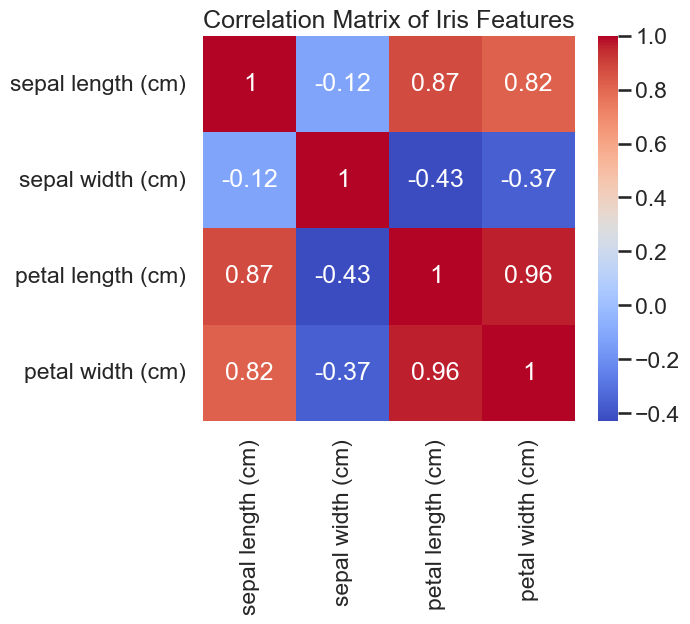

In [88]:
iris_features = iris_data.data  # Extract only the feature values

# Compute correlation matrix
corr_matrix = np.corrcoef(iris_features, rowvar=False)

# Plot the heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", xticklabels=iris_data.feature_names, yticklabels=iris_data.feature_names)
plt.title("Correlation Matrix of Iris Features")
plt.show()

iris_df = load_iris()

**So here i decided to do a correlation matrix betweeen the four fetaures in the dataset to see if there are any fetaures that are strongly correlated so  when i plotted this corr matrix i found that the petal width and petal length features are strongly correlated with very high number 0.96,However iris dataset only has four features, meaning each contributes valuable information so if i decided to  drop any features this could lead to information loss and negatively impact clustering or classification performance so i decided to leave them as they are.**

## FIRST: WITHOUT SCALING , WILL DO ALL 3 CLUSTERING TECHNIQUES

## Kmeans

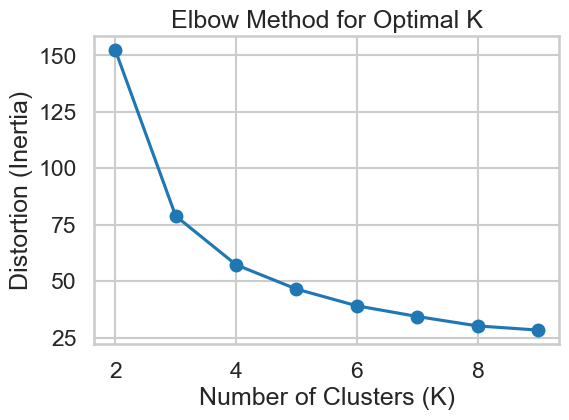

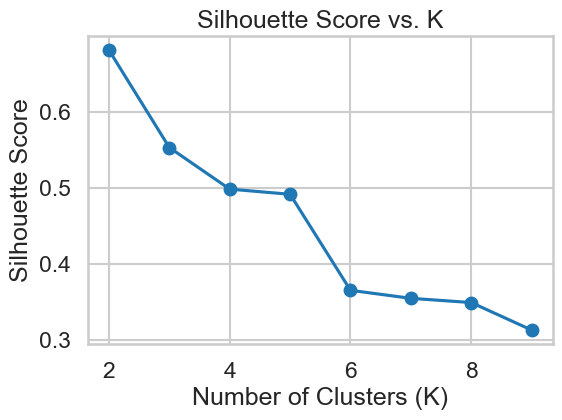

The best K is 2 with a silhouette score of 0.6810

Effect of Centroid Initialization:
Using 'k-means++' improves centroid selection by placing them far apart initially,
which leads to faster convergence and more stable clustering results.


In [92]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Function to perform KMeans clustering and evaluation

def evaluate_kmeans(X, K_values=range(2, 10)):
    distortions = []
    silhouette_scores = {}

    for K in K_values:
        km = KMeans(n_clusters=K, init='k-means++', n_init=10, random_state=42)
        km.fit(X)

        distortions.append(km.inertia_)  # Store inertia (distortion function)
        score = silhouette_score(X, km.labels_)
        silhouette_scores[K] = score  # Store silhouette score

    # Plot the distortion function vs. K (Elbow Method)
    plt.figure(figsize=(6, 4))
    plt.plot(K_values, distortions, marker='o', linestyle='-')
    plt.xlabel('Number of Clusters (K)')
    plt.ylabel('Distortion (Inertia)')
    plt.title('Elbow Method for Optimal K')
    plt.show()

    # Plot the silhouette score vs. K
    plt.figure(figsize=(6, 4))
    plt.plot(K_values, list(silhouette_scores.values()), marker='o', linestyle='-')
    plt.xlabel('Number of Clusters (K)')
    plt.ylabel('Silhouette Score')
    plt.title('Silhouette Score vs. K')
    plt.show()

    # Store the best K based on silhouette score
    best_K = max(silhouette_scores, key=silhouette_scores.get)
    best_score = silhouette_scores[best_K]
    print(f"The best K is {best_K} with a silhouette score of {best_score:.4f}")

    # Comment on centroid initialization
    print("\nEffect of Centroid Initialization:")
    print("Using 'k-means++' improves centroid selection by placing them far apart initially,")
    print("which leads to faster convergence and more stable clustering results.")

    return best_K, best_score  # Return best K and silhouette score for later use

# Run evaluation function with iris_df
best_K, best_silhouette_score = evaluate_kmeans(iris_df.data)


**So here by looking at the elbow method graph the best choice seems to be k equals to 3 because after that the decrease in distortion slows down and when i searched online I found that the ideal clustering for the iris dataset is 3 clusters so this validates the elbow graph here, however the silhouette score plot shows the highest value at k equals 2 but it decreases beyond that. So the algorithm here chose the best K based on the Silhouette Score which evaluates both cluster compactness and separation, making it a stronger metric. While the Elbow Method suggested K = 3, it only considers cluster variance. Since K = 2 had the highest silhouette score it indicates the most distinct clustering.**

## AGGLOMERATIVE CLUSTERING

Metric: euclidean, Linkage: complete, Distance Threshold: 2, Silhouette Score: 0.3382
Metric: euclidean, Linkage: complete, Distance Threshold: 3, Silhouette Score: 0.4998
Metric: euclidean, Linkage: complete, Distance Threshold: 4, Silhouette Score: 0.5136
Metric: euclidean, Linkage: complete, Distance Threshold: 5, Silhouette Score: 0.5160
Metric: euclidean, Linkage: average, Distance Threshold: 2, Silhouette Score: 0.6867
Metric: euclidean, Linkage: average, Distance Threshold: 3, Silhouette Score: 0.6867
Metric: euclidean, Linkage: average, Distance Threshold: 4, Silhouette Score: 0.6867
Skipped combination: Metric=euclidean, Linkage=average, Error: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)
Skipped combination: Metric=euclidean, Linkage=single, Error: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)
Skipped combination: Metric=euclidean, Linkage=single, Error: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)
S

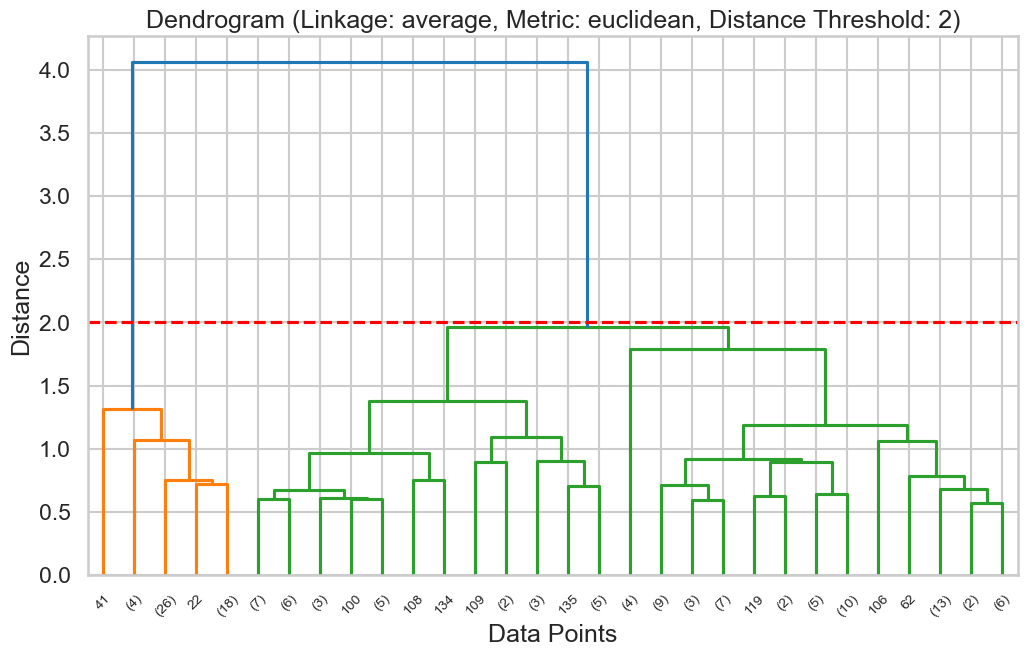

In [95]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage as scipy_linkage
from scipy.spatial.distance import pdist



# Assuming iris_df is already defined and contains the dataset
X = iris_df.data  # Convert DataFrame to NumPy array

# Define clustering parameters
metric_options = ['euclidean', 'manhattan', 'cosine']
linkage_options = ['complete', 'average', 'single']
distance_thresholds = [2, 3, 4, 5]


# Store best results
best_score = -1
best_params = None
best_labels = None

# Iterate over different clustering parameters
for metric in metric_options:
    for linkage_method in linkage_options:
        for dist_threshold in distance_thresholds:
            try:
                # Apply Agglomerative Clustering
                model = AgglomerativeClustering(
                    metric=metric,
                    linkage=linkage_method,
                    distance_threshold=dist_threshold,
                    n_clusters=None  # Let it determine clusters
                )
                labels = model.fit_predict(X)
                sil_score = silhouette_score(X, labels)

                # Print results for each combination
                print(f"Metric: {metric}, Linkage: {linkage_method}, Distance Threshold: {dist_threshold}, Silhouette Score: {sil_score:.4f}")

                # Track best score
                if sil_score > best_score:
                    best_score = sil_score
                    best_params = (metric, linkage_method, dist_threshold)
                    best_labels = labels

            except Exception as e:
                print(f"Skipped combination: Metric={metric}, Linkage={linkage_method}, Error: {e}")

# Print the best clustering parameters and silhouette score
print("\nBest Clustering Parameters:")
print(f"Metric: {best_params[0]}")
print(f"Linkage: {best_params[1]}")
print(f"Distance Threshold: {best_params[2]}")
print(f"Best Silhouette Score: {best_score:.4f}")
num_clusters = len(set(best_labels))  # Count unique cluster labels
print(f"Number of Clusters: {num_clusters}")


#HERE IS THE PLOT OF THE DENDROGRAM STARTS
# Function to fix metric names for pdist()
def fix_metric_name(metric):
    if metric == "manhattan":
        return "cityblock"  
    elif metric == "cosine":
        return "cosine"  
    elif metric == "euclidean":
        return "euclidean"  
    else:
        raise ValueError(f"Unsupported metric: {metric}")  # Handle unexpected cases

# Fix the metric name
fixed_metric = fix_metric_name(best_params[0])

# Compute pairwise distances
distance_matrix = pdist(X, fixed_metric)  # Convert X into a condensed distance matrix

# Compute linkage using the precomputed distance matrix
linked = scipy_linkage(distance_matrix, method=best_params[1])  # No metric needed here

# Plot dendrogram
plt.figure(figsize=(12, 7))
plt.title(f"Dendrogram (Linkage: {best_params[1]}, Metric: {best_params[0]}, Distance Threshold: {best_params[2]})")
plt.xlabel("Data Points")
plt.ylabel("Distance")

# Plot dendrogram with color threshold
dendrogram(linked, color_threshold=best_params[2], truncate_mode='lastp')
plt.axhline(y=best_params[2], color='red', linestyle='--')  # Threshold line

plt.show()


**Here the agglomerative clustering chose the best combination of parameters are euclidean distance and average linkage and threshold of 2 resulting into 2 clusters with siloutte score of 0.6867 which is a slightly higher score than the kmeans clustering but they both gave the same no of clusters**

## DBSCAN

In [98]:
import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

# Function to Run DBSCAN and Find Best Clustering

def run_dbscan(X, eps_values=np.linspace(0.1, 3, 30), min_samples_values=range(5, 25, 1)):
    best_silhouette = -1
    best_params = None
    best_labels = None
    silhouette_scores = {}
    best_num_clusters = 0

    # Iterate over different EPS and min_samples values
    for eps in eps_values:
        for min_samples in min_samples_values:
            model = DBSCAN(eps=eps, min_samples=min_samples)
            labels = model.fit_predict(X)

            # Ignore cases where only 1 cluster is found
            unique_clusters = set(labels) - {-1}  # Remove noise (-1)
            num_clusters = len(unique_clusters)

            if num_clusters < 2:
                continue  

            # Calculate Silhouette Score
            score = silhouette_score(X, labels)
            silhouette_scores[(eps, min_samples)] = score  

            # Track best parameters
            if score > best_silhouette:
                best_silhouette = score
                best_params = (eps, min_samples)
                best_labels = labels
                best_num_clusters = num_clusters

    print("\nBest Parameters Found:")
    print(f"EPS: {best_params[0]:.2f}, Min Samples: {best_params[1]}, Silhouette Score: {best_silhouette:.4f}")
    print(f"Number of Clusters: {best_num_clusters}")

    return best_params, best_labels, silhouette_scores, best_num_clusters

# Run DBSCAN without plotting all clusters
best_params, best_labels, silhouette_scores, best_num_clusters = run_dbscan(iris_df.data)



Best Parameters Found:
EPS: 0.90, Min Samples: 5, Silhouette Score: 0.6867
Number of Clusters: 2



Final Best Clustering Results:
Best EPS: 0.90
Best Min Samples: 5
Best Number of Clusters: 2
Best Silhouette Score: 0.6867



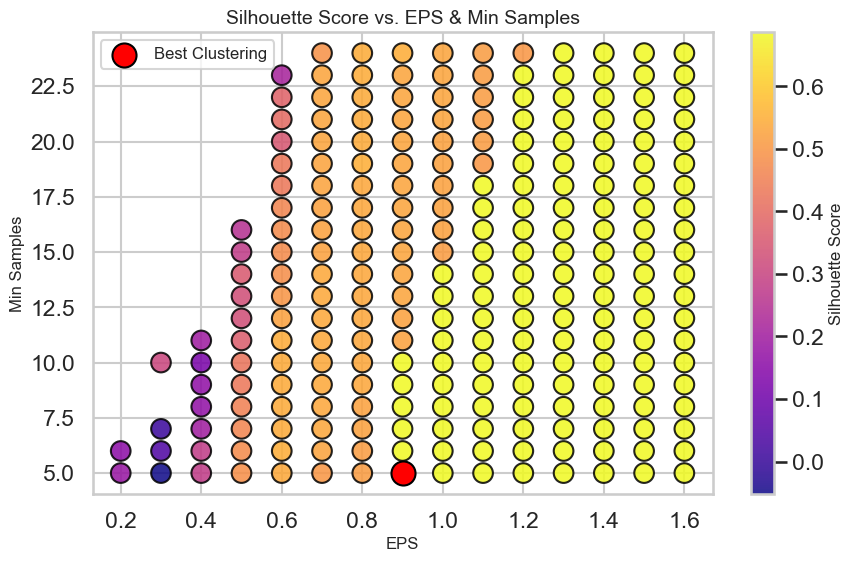

In [99]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Function to Display Best Parameters and Final Clustering Results
def display_best_clustering(X, best_params, best_labels, silhouette_scores, best_num_clusters):
    eps_best, min_samples_best = best_params
    best_silhouette = max(silhouette_scores.values())

    # Display Best Clustering Parameters
    print("\nFinal Best Clustering Results:")
    print(f"Best EPS: {eps_best:.2f}")
    print(f"Best Min Samples: {min_samples_best}")
    print(f"Best Number of Clusters: {best_num_clusters}")
    print(f"Best Silhouette Score: {best_silhouette:.4f}\n")

    # Convert silhouette_scores to DataFrame
    df = pd.DataFrame(list(silhouette_scores.items()), columns=["Params", "Silhouette Score"])
    df[["EPS", "Min Samples"]] = pd.DataFrame(df["Params"].tolist(), index=df.index)
    df.drop(columns=["Params"], inplace=True)

    # ---- 2D Scatter Plot with Color Gradient ----
    plt.figure(figsize=(10, 6))
    scatter = plt.scatter(df["EPS"], df["Min Samples"], c=df["Silhouette Score"], cmap="plasma", 
                          s=200, alpha=0.85, edgecolors="k")

    # Highlight best clustering point
    plt.scatter(eps_best, min_samples_best, color="red", s=300, edgecolors="black", label="Best Clustering")

    plt.xlabel("EPS", fontsize=12)
    plt.ylabel("Min Samples", fontsize=12)
    plt.title("Silhouette Score vs. EPS & Min Samples", fontsize=14)
    
    # Add color bar
    cbar = plt.colorbar(scatter)
    cbar.set_label("Silhouette Score", fontsize=12)

    plt.legend(loc="best", fontsize=12)
    plt.grid(True)
    plt.show()

# Run function with iris dataset
display_best_clustering(iris_df.data, best_params, best_labels, silhouette_scores, best_num_clusters)


**The best DBSCAN results were with EPS = 0.90 and Min Samples = 5, forming 2 clusters the same as in Kmeans and agglomerative clustering techniques with a silhouette score of 0.6867 the same as the agglomerative clustering. However i previously explained that the DBSCAN faces problem when clusters have varying densities or are not well-separated, this is why the agglomerative maybe a better clustering here.**

## SECOND: WITH SCALING OF THE 2 FEATURES

## Scaling the features of iris_df

In [103]:
print(iris_df.data[:10])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]


**so as you see here the data of this dataset may need scaling as for example the last column values have lower ranges so this will give the chance for some features to be more dominant so i will do scaling to examine the difference however i expect to see no big differences as we can consider that the range of values between the columns is not that big** 

In [105]:
from sklearn.preprocessing import StandardScaler

iris_df = iris_df.data  # Extract the feature matrix

# Initialize and apply StandardScaler
scaler = StandardScaler()
iris_df = scaler.fit_transform(iris_df)  

# Print the first 10 rows after scaling
print(iris_df[:10])

[[-0.90068117  1.01900435 -1.34022653 -1.3154443 ]
 [-1.14301691 -0.13197948 -1.34022653 -1.3154443 ]
 [-1.38535265  0.32841405 -1.39706395 -1.3154443 ]
 [-1.50652052  0.09821729 -1.2833891  -1.3154443 ]
 [-1.02184904  1.24920112 -1.34022653 -1.3154443 ]
 [-0.53717756  1.93979142 -1.16971425 -1.05217993]
 [-1.50652052  0.78880759 -1.34022653 -1.18381211]
 [-1.02184904  0.78880759 -1.2833891  -1.3154443 ]
 [-1.74885626 -0.36217625 -1.34022653 -1.3154443 ]
 [-1.14301691  0.09821729 -1.2833891  -1.44707648]]


## Kmeans

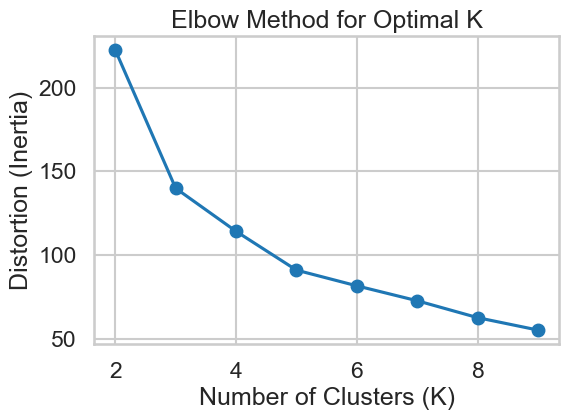

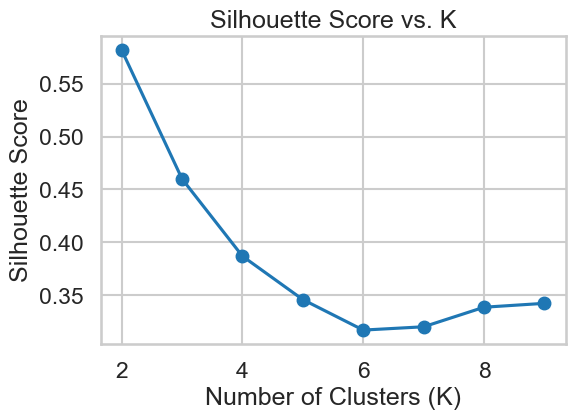

The best K is 2 with a silhouette score of 0.5818

Effect of Centroid Initialization:
Using 'k-means++' improves centroid selection by placing them far apart initially,
which leads to faster convergence and more stable clustering results.


In [107]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Function to perform KMeans clustering and evaluation

def evaluate_kmeans(X, K_values=range(2, 10)):
    distortions = []
    silhouette_scores = {}

    for K in K_values:
        km = KMeans(n_clusters=K, init='k-means++', n_init=10, random_state=42)
        km.fit(X)

        distortions.append(km.inertia_)  # Store inertia (distortion function)
        score = silhouette_score(X, km.labels_)
        silhouette_scores[K] = score  # Store silhouette score

    # Plot the distortion function vs. K (Elbow Method)
    plt.figure(figsize=(6, 4))
    plt.plot(K_values, distortions, marker='o', linestyle='-')
    plt.xlabel('Number of Clusters (K)')
    plt.ylabel('Distortion (Inertia)')
    plt.title('Elbow Method for Optimal K')
    plt.show()

    # Plot the silhouette score vs. K
    plt.figure(figsize=(6, 4))
    plt.plot(K_values, list(silhouette_scores.values()), marker='o', linestyle='-')
    plt.xlabel('Number of Clusters (K)')
    plt.ylabel('Silhouette Score')
    plt.title('Silhouette Score vs. K')
    plt.show()

    # Store the best K based on silhouette score
    best_K = max(silhouette_scores, key=silhouette_scores.get)
    best_score = silhouette_scores[best_K]
    print(f"The best K is {best_K} with a silhouette score of {best_score:.4f}")

    # Comment on centroid initialization
    print("\nEffect of Centroid Initialization:")
    print("Using 'k-means++' improves centroid selection by placing them far apart initially,")
    print("which leads to faster convergence and more stable clustering results.")

    return best_K, best_score  # Return best K and silhouette score for later use

# Run evaluation function with iris_df
best_K, best_silhouette_score = evaluate_kmeans(iris_df)


**After scaling we can see that the number of clusters remains the same, and the highest silhouette score is still at K = 2, indicating that scaling did not significantly change the clustering structure however the siloutte score decreased slighlty means that the cluster separation has slightly weakened but the overall structure remains similar so scaling had a very minor impact. Also we see that the elbow method graph remains same indicating that the best clustering can be at k=3**

## Agglomerative Clustering

Metric: euclidean, Linkage: complete, Distance Threshold: 2, Silhouette Score: 0.3307
Metric: euclidean, Linkage: complete, Distance Threshold: 3, Silhouette Score: 0.3107
Metric: euclidean, Linkage: complete, Distance Threshold: 4, Silhouette Score: 0.4106
Metric: euclidean, Linkage: complete, Distance Threshold: 5, Silhouette Score: 0.4496
Metric: euclidean, Linkage: average, Distance Threshold: 2, Silhouette Score: 0.3248
Metric: euclidean, Linkage: average, Distance Threshold: 3, Silhouette Score: 0.4803
Skipped combination: Metric=euclidean, Linkage=average, Error: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)
Skipped combination: Metric=euclidean, Linkage=average, Error: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)
Skipped combination: Metric=euclidean, Linkage=single, Error: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)
Skipped combination: Metric=euclidean, Linkage=single, Error: Number of labels is 1. 

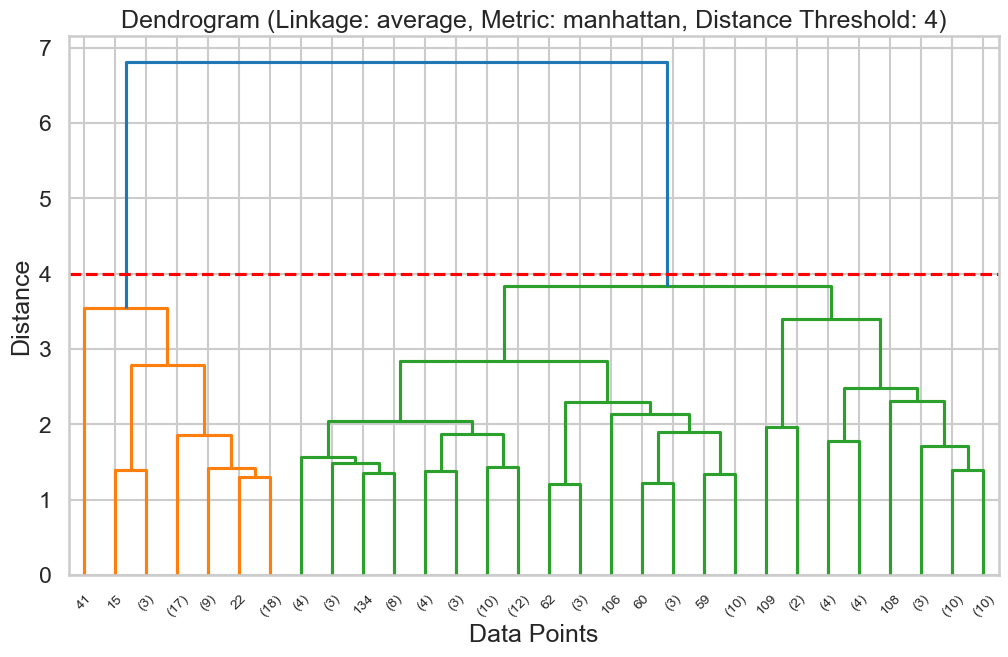

In [110]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage as scipy_linkage
from scipy.spatial.distance import pdist


# Assuming iris_df is already defined and contains the dataset
X = iris_df  # Convert DataFrame to NumPy array

# Define clustering parameters
metric_options = ['euclidean', 'manhattan', 'cosine']
linkage_options = ['complete', 'average', 'single']
distance_thresholds = [2, 3, 4, 5]

# Store best results
best_score = -1
best_params = None
best_labels = None

# Iterate over different clustering parameters
for metric in metric_options:
    for linkage_method in linkage_options:
        for dist_threshold in distance_thresholds:
            try:
                # Apply Agglomerative Clustering
                model = AgglomerativeClustering(
                    metric=metric,
                    linkage=linkage_method,
                    distance_threshold=dist_threshold,
                    n_clusters=None  # Let it determine clusters
                )
                labels = model.fit_predict(X)
                sil_score = silhouette_score(X, labels)

                # Print results for each combination
                print(f"Metric: {metric}, Linkage: {linkage_method}, Distance Threshold: {dist_threshold}, Silhouette Score: {sil_score:.4f}")

                # Track best score
                if sil_score > best_score:
                    best_score = sil_score
                    best_params = (metric, linkage_method, dist_threshold)
                    best_labels = labels

            except Exception as e:
                print(f"Skipped combination: Metric={metric}, Linkage={linkage_method}, Error: {e}")

# Print the best clustering parameters and silhouette score
print("\nBest Clustering Parameters:")
print(f"Metric: {best_params[0]}")
print(f"Linkage: {best_params[1]}")
print(f"Distance Threshold: {best_params[2]}")
print(f"Best Silhouette Score: {best_score:.4f}")
num_clusters = len(set(best_labels))  # Count unique cluster labels
print(f"Number of Clusters: {num_clusters}")

#HERE IS THE PLOT OF THE DENDROGRAM STARTS
# Function to fix metric names for pdist()
def fix_metric_name(metric):
    if metric == "manhattan":
        return "cityblock"  
    elif metric == "cosine":
        return "cosine"  
    elif metric == "euclidean":
        return "euclidean"  
    else:
        raise ValueError(f"Unsupported metric: {metric}")  # Handle unexpected cases

# Fix the metric name
fixed_metric = fix_metric_name(best_params[0])

# Compute pairwise distances
distance_matrix = pdist(X, fixed_metric)  # Convert X into a condensed distance matrix

# Compute linkage using the precomputed distance matrix
linked = scipy_linkage(distance_matrix, method=best_params[1])  # No metric needed here

# Plot dendrogram
plt.figure(figsize=(12, 7))
plt.title(f"Dendrogram (Linkage: {best_params[1]}, Metric: {best_params[0]}, Distance Threshold: {best_params[2]})")
plt.xlabel("Data Points")
plt.ylabel("Distance")

# Plot dendrogram with color threshold
dendrogram(linked, color_threshold=best_params[2], truncate_mode='lastp')
plt.axhline(y=best_params[2], color='red', linestyle='--')  # Threshold line

plt.show()

**After scaling the overall cluster assignments remained the same (2 clusters), indicating that the clustering structure was stable despite variations in score. However, the agglomerative Clustering parameters changed, leading to a decrease in the silhouette score. This happens because scaling affects the distance calculations that leads to altering the cluster compactness and separation.**

## DBSCAN

In [113]:
import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

# Function to Run DBSCAN and Find Best Clustering

def run_dbscan(X, eps_values=np.linspace(0.1, 3, 30), min_samples_values=range(5, 25, 1)):
    best_silhouette = -1
    best_params = None
    best_labels = None
    silhouette_scores = {}
    best_num_clusters = 0

    # Iterate over different EPS and min_samples values
    for eps in eps_values:
        for min_samples in min_samples_values:
            model = DBSCAN(eps=eps, min_samples=min_samples)
            labels = model.fit_predict(X)

            # Ignore cases where only 1 cluster is found
            unique_clusters = set(labels) - {-1}  # Remove noise (-1)
            num_clusters = len(unique_clusters)

            if num_clusters < 2:
                continue  

            # Calculate Silhouette Score
            score = silhouette_score(X, labels)
            silhouette_scores[(eps, min_samples)] = score  

            # Track best parameters
            if score > best_silhouette:
                best_silhouette = score
                best_params = (eps, min_samples)
                best_labels = labels
                best_num_clusters = num_clusters

    print("\nBest Parameters Found:")
    print(f"EPS: {best_params[0]:.2f}, Min Samples: {best_params[1]}, Silhouette Score: {best_silhouette:.4f}")
    print(f"Number of Clusters: {best_num_clusters}")

    return best_params, best_labels, silhouette_scores, best_num_clusters

# Run DBSCAN without plotting all clusters
best_params, best_labels, silhouette_scores, best_num_clusters = run_dbscan(iris_df)



Best Parameters Found:
EPS: 1.40, Min Samples: 5, Silhouette Score: 0.5818
Number of Clusters: 2



Final Best Clustering Results:
Best EPS: 1.40
Best Min Samples: 5
Best Number of Clusters: 2
Best Silhouette Score: 0.5818



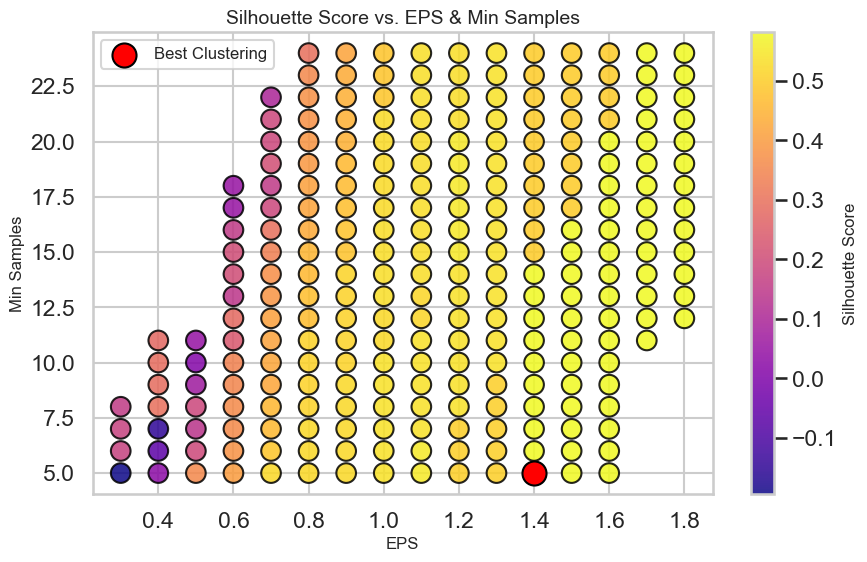

In [114]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Function to Display Best Parameters and Final Clustering Results
def display_best_clustering(X, best_params, best_labels, silhouette_scores, best_num_clusters):
    eps_best, min_samples_best = best_params
    best_silhouette = max(silhouette_scores.values())

    # Display Best Clustering Parameters
    print("\nFinal Best Clustering Results:")
    print(f"Best EPS: {eps_best:.2f}")
    print(f"Best Min Samples: {min_samples_best}")
    print(f"Best Number of Clusters: {best_num_clusters}")
    print(f"Best Silhouette Score: {best_silhouette:.4f}\n")

    # Convert silhouette_scores to DataFrame
    df = pd.DataFrame(list(silhouette_scores.items()), columns=["Params", "Silhouette Score"])
    df[["EPS", "Min Samples"]] = pd.DataFrame(df["Params"].tolist(), index=df.index)
    df.drop(columns=["Params"], inplace=True)

    # ---- 2D Scatter Plot with Color Gradient ----
    plt.figure(figsize=(10, 6))
    scatter = plt.scatter(df["EPS"], df["Min Samples"], c=df["Silhouette Score"], cmap="plasma", 
                          s=200, alpha=0.85, edgecolors="k")

    # Highlight best clustering point
    plt.scatter(eps_best, min_samples_best, color="red", s=300, edgecolors="black", label="Best Clustering")

    plt.xlabel("EPS", fontsize=12)
    plt.ylabel("Min Samples", fontsize=12)
    plt.title("Silhouette Score vs. EPS & Min Samples", fontsize=14)
    
    # Add color bar
    cbar = plt.colorbar(scatter)
    cbar.set_label("Silhouette Score", fontsize=12)

    plt.legend(loc="best", fontsize=12)
    plt.grid(True)
    plt.show()

# Run function with iris dataset
display_best_clustering(iris_df, best_params, best_labels, silhouette_scores, best_num_clusters)


**After scaling the DBSCAN parameters changed (EPS = 1.4, Min Samples =5) but the number of clusters remained at 2 and the silhouette score slightly decreased to 0.5818. This indicates that while scaling affected the density-based clustering parameters, the overall cluster structure stayed the same and the small drop in the silhouette score suggests that scaling slightly reduced cluster separation but did not significantly impact the clustering quality.**

## Iris Dataset observations

**I researched and found that the Iris dataset is best clustered into K = 3 aligning with its three species. However, all three clustering techniques failed to correctly identify K = 3 based on the siloutte score, consistently selecting K = 2 both before and after scaling. So this happens because 2 species of the 3 species (versicolor, virginica) are overlapping, making them hard to distinguish in a low-dimensional feature space. Since the Silhouette Score favors well-separated clusters, it selects K = 2 because it sees these 2 species as one broad group so they see them as one cluster rather than distinct clusters and the other one also one cluster so overall it divides all the data into 2 clusters rather than 3 so this is the reason why all the techniques failed to get this correctly. 
Although scaling keeps the clustering results the same however the Silhouette Score in all the 3 techniques decreased after scaling. This happens because standardization reduces the influence of larger values on the small ones, making clusters more compact but also slightly increasing overlap, which lowers the silhouette score. The Kmeans technique was the only one that we can see on that the best clustering was at k=3 as shown in the elbow method graph however it also failed to identify this using the siloutte score like the other 2 techniques**

## Customer dataset
Repeat all the above on the customer data set 

## Reading the dataset

In [120]:
# Read the CSV file
cust_df = pd.read_csv("Customer_data.csv")

# Display the first few rows
print(cust_df.head())

          ID  Sex  Marital status  Age  Education  Income  Occupation  \
0  100000001    0               0   67          2  124670           1   
1  100000002    1               1   22          1  150773           1   
2  100000003    0               0   49          1   89210           0   
3  100000004    0               0   45          1  171565           1   
4  100000005    0               0   53          1  149031           1   

   Settlement size  
0                2  
1                2  
2                0  
3                1  
4                1  


In [121]:
# checking for null values
cust_df.isnull().sum()


ID                 0
Sex                0
Marital status     0
Age                0
Education          0
Income             0
Occupation         0
Settlement size    0
dtype: int64

**First i will drop the ID column as it is just like an index and it have no importance with clustering.**

In [123]:
#dropping the ID
cust_df = cust_df.drop(columns=["ID"])  # Creates a new DataFrame without "ID"



**Secondly I will do scaling as we can see that there are some features that have larger values than other so we need to scale so we can prevent any dominance so I used Min-Max Scaling to preserve the binary values (0 and 1) in my dataset. Unlike Standard Scaling which can alter binary features Min-Max Scaling keeps them unchanged while scaling other numerical features between 0 and 1 maintaining their relative importance.**

In [125]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the Min-Max Scaler
scaler = MinMaxScaler()

# Apply scaling to the entire dataset
cust_df[:] = scaler.fit_transform(cust_df)

# Display the first few rows
cust_df.head()

Sex  Marital status       Age  Education    Income  Occupation  \
0    0               0  0.844828   0.666667  0.324781         0.5   
1    1               1  0.068966   0.333333  0.420210         0.5   
2    0               0  0.534483   0.333333  0.195144         0.0   
3    0               0  0.465517   0.333333  0.496223         0.5   
4    0               0  0.603448   0.333333  0.413842         0.5   

   Settlement size  
0              1.0  
1              1.0  
2              0.0  
3              0.5  
4              0.5

## Kmeans

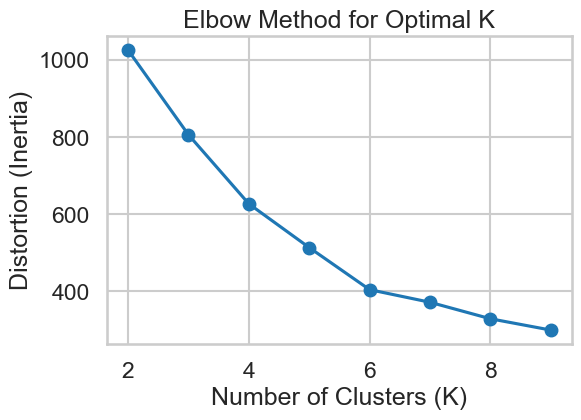

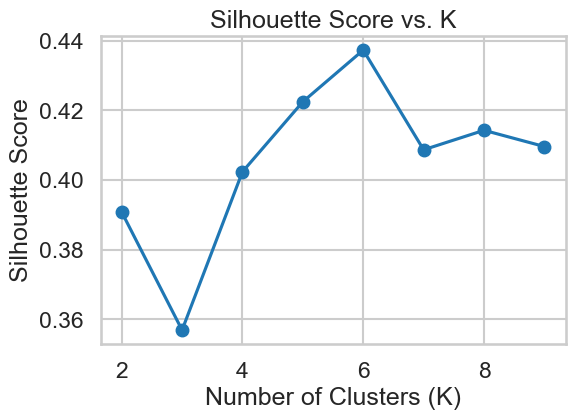

The best K is 6 with a silhouette score of 0.4373

Effect of Centroid Initialization:
Using 'k-means++' improves centroid selection by placing them far apart initially,
which leads to faster convergence and more stable clustering results.


In [127]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Function to perform KMeans clustering and evaluation

def evaluate_kmeans(X, K_values=range(2, 10)):
    distortions = []
    silhouette_scores = {}

    for K in K_values:
        km = KMeans(n_clusters=K, init='k-means++', n_init=10, random_state=42)
        km.fit(X)

        distortions.append(km.inertia_)  # Store inertia (distortion function)
        score = silhouette_score(X, km.labels_)
        silhouette_scores[K] = score  # Store silhouette score

    # Plot the distortion function vs. K (Elbow Method)
    plt.figure(figsize=(6, 4))
    plt.plot(K_values, distortions, marker='o', linestyle='-')
    plt.xlabel('Number of Clusters (K)')
    plt.ylabel('Distortion (Inertia)')
    plt.title('Elbow Method for Optimal K')
    plt.show()

    # Plot the silhouette score vs. K
    plt.figure(figsize=(6, 4))
    plt.plot(K_values, list(silhouette_scores.values()), marker='o', linestyle='-')
    plt.xlabel('Number of Clusters (K)')
    plt.ylabel('Silhouette Score')
    plt.title('Silhouette Score vs. K')
    plt.show()

    # Store the best K based on silhouette score
    best_K = max(silhouette_scores, key=silhouette_scores.get)
    best_score = silhouette_scores[best_K]
    print(f"The best K is {best_K} with a silhouette score of {best_score:.4f}")

    # Comment on centroid initialization
    print("\nEffect of Centroid Initialization:")
    print("Using 'k-means++' improves centroid selection by placing them far apart initially,")
    print("which leads to faster convergence and more stable clustering results.")

    return best_K, best_score  # Return best K and silhouette score for later use

# Run evaluation function with iris_df
best_K, best_silhouette_score = evaluate_kmeans(cust_df.values)


**Here the Elbow Method graph shows a noticeable elbow around K = 6 suggesting that this could be an appropriate choice for the number of clusters as we see adding more clusters beyond this point results in a diminishing reduction in inertia. Also the Silhouette Score graph here further supports this finding with the highest score (0.4373) occurring at K = 6 so this means that this dataset using Kmeans can be best clustered at k=6 and both graphs supports this conc.**

## Agglomerative

Metric: euclidean, Linkage: complete, Distance Threshold: 2, Silhouette Score: 0.3550
Skipped combination: Metric=euclidean, Linkage=complete, Error: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)
Skipped combination: Metric=euclidean, Linkage=complete, Error: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)
Skipped combination: Metric=euclidean, Linkage=complete, Error: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)
Skipped combination: Metric=euclidean, Linkage=average, Error: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)
Skipped combination: Metric=euclidean, Linkage=average, Error: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)
Skipped combination: Metric=euclidean, Linkage=average, Error: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)
Skipped combination: Metric=euclidean, Linkage=average, Error: Number of labels is 1. Valid values are 2 to

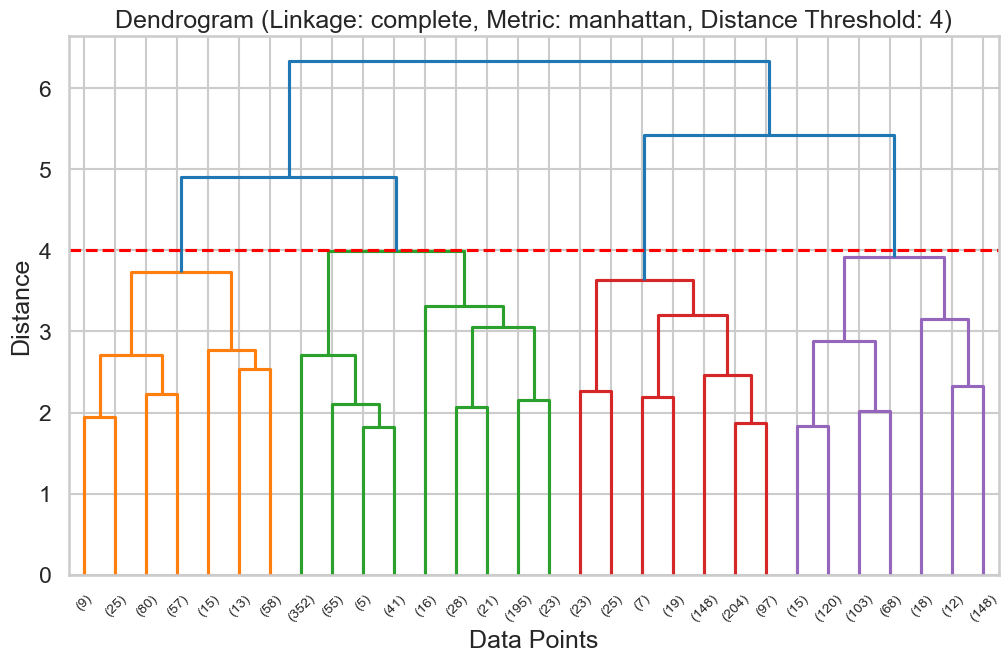

In [130]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage as scipy_linkage
from scipy.spatial.distance import pdist


# Assuming iris_df is already defined and contains the dataset
X = cust_df.values 

# Define clustering parameters
metric_options = ['euclidean', 'manhattan', 'cosine']
linkage_options = ['complete', 'average', 'single']
distance_thresholds = [2, 3, 4, 5]


# Store best results
best_score = -1
best_params = None
best_labels = None

# Iterate over different clustering parameters
for metric in metric_options:
    for linkage_method in linkage_options:
        for dist_threshold in distance_thresholds:
            try:
                # Apply Agglomerative Clustering
                model = AgglomerativeClustering(
                    metric=metric,
                    linkage=linkage_method,
                    distance_threshold=dist_threshold,
                    n_clusters=None  # Let it determine clusters
                )
                labels = model.fit_predict(X)
                sil_score = silhouette_score(X, labels)

                # Print results for each combination
                print(f"Metric: {metric}, Linkage: {linkage_method}, Distance Threshold: {dist_threshold}, Silhouette Score: {sil_score:.4f}")

                # Track best score
                if sil_score > best_score:
                    best_score = sil_score
                    best_params = (metric, linkage_method, dist_threshold)
                    best_labels = labels

            except Exception as e:
                print(f"Skipped combination: Metric={metric}, Linkage={linkage_method}, Error: {e}")

# Print the best clustering parameters and silhouette score
print("\nBest Clustering Parameters:")
print(f"Metric: {best_params[0]}")
print(f"Linkage: {best_params[1]}")
print(f"Distance Threshold: {best_params[2]}")
print(f"Best Silhouette Score: {best_score:.4f}")
num_clusters = len(set(best_labels))  # Count unique cluster labels
print(f"Number of Clusters: {num_clusters}")


#HERE IS THE PLOT OF THE DENDROGRAM STARTS
# Function to fix metric names for pdist()
def fix_metric_name(metric):
    if metric == "manhattan":
        return "cityblock"  
    elif metric == "cosine":
        return "cosine"  
    elif metric == "euclidean":
        return "euclidean"  
    else:
        raise ValueError(f"Unsupported metric: {metric}")  # Handle unexpected cases

# Fix the metric name
fixed_metric = fix_metric_name(best_params[0])

# Compute pairwise distances
distance_matrix = pdist(X, fixed_metric)  # Convert X into a condensed distance matrix

# Compute linkage using the precomputed distance matrix
linked = scipy_linkage(distance_matrix, method=best_params[1])  # No metric needed here

# Plot dendrogram
plt.figure(figsize=(12, 7))
plt.title(f"Dendrogram (Linkage: {best_params[1]}, Metric: {best_params[0]}, Distance Threshold: {best_params[2]})")
plt.xlabel("Data Points")
plt.ylabel("Distance")

# Plot dendrogram with color threshold
dendrogram(linked, color_threshold=best_params[2], truncate_mode='lastp')
plt.axhline(y=best_params[2], color='red', linestyle='--')  # Threshold line

plt.show()


**The Agglomerative Clustering model with the best parameters (Manhattan distance, complete linkage, and a distance threshold of 4) resulted in 4 clusters with a silhouette score of 0.4004. In comparison, the KMeans clustering approach produced 6 clusters with a higher silhouette score of 0.4373, indicating better-defined clusters**

## DBSCAN

In [133]:
import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

# Function to Run DBSCAN and Find Best Clustering

def run_dbscan(X, eps_values=np.linspace(0.3, 2.5, 30), min_samples_values=range(60, 200, 4)):
    best_silhouette = -1
    best_params = None
    best_labels = None
    silhouette_scores = {}
    best_num_clusters = 0

    # Iterate over different EPS and min_samples values
    for eps in eps_values:
        for min_samples in min_samples_values:
            model = DBSCAN(eps=eps, min_samples=min_samples)
            labels = model.fit_predict(X)

            # Ignore cases where only 1 cluster is found
            unique_clusters = set(labels) - {-1}  # Remove noise (-1)
            num_clusters = len(unique_clusters)

            if num_clusters < 2:
                continue  

            # Calculate Silhouette Score
            score = silhouette_score(X, labels)
            silhouette_scores[(eps, min_samples)] = score  

            # Track best parameters
            if score > best_silhouette:
                best_silhouette = score
                best_params = (eps, min_samples)
                best_labels = labels
                best_num_clusters = num_clusters

    print("\nBest Parameters Found:")
    print(f"EPS: {best_params[0]:.2f}, Min Samples: {best_params[1]}, Silhouette Score: {best_silhouette:.4f}")
    print(f"Number of Clusters: {best_num_clusters}")

    return best_params, best_labels, silhouette_scores, best_num_clusters

# Run DBSCAN without plotting all clusters
best_params, best_labels, silhouette_scores, best_num_clusters = run_dbscan(cust_df.values)



Best Parameters Found:
EPS: 0.68, Min Samples: 60, Silhouette Score: 0.4036
Number of Clusters: 4



Final Best Clustering Results:
Best EPS: 0.68
Best Min Samples: 60
Best Number of Clusters: 4
Best Silhouette Score: 0.4036



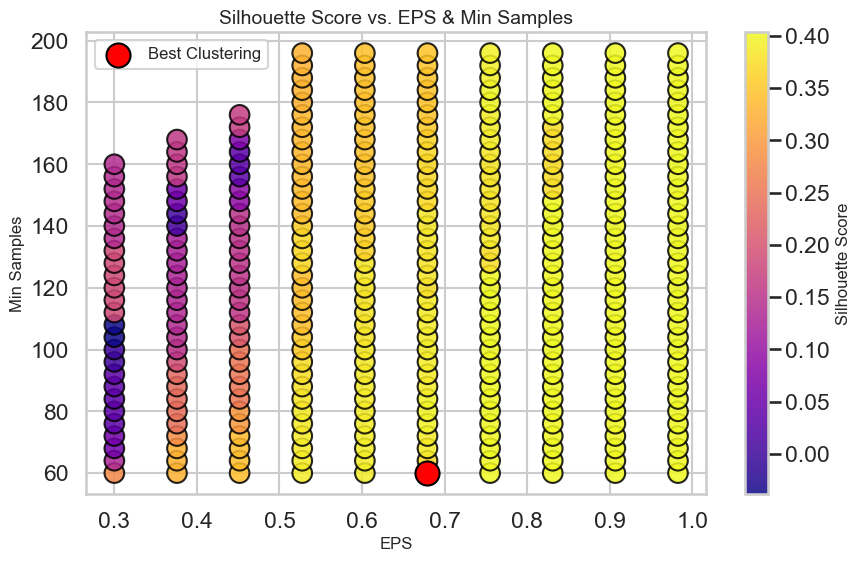

In [134]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Function to Display Best Parameters and Final Clustering Results
def display_best_clustering(X, best_params, best_labels, silhouette_scores, best_num_clusters):
    eps_best, min_samples_best = best_params
    best_silhouette = max(silhouette_scores.values())

    # Display Best Clustering Parameters
    print("\nFinal Best Clustering Results:")
    print(f"Best EPS: {eps_best:.2f}")
    print(f"Best Min Samples: {min_samples_best}")
    print(f"Best Number of Clusters: {best_num_clusters}")
    print(f"Best Silhouette Score: {best_silhouette:.4f}\n")

    # Convert silhouette_scores to DataFrame
    df = pd.DataFrame(list(silhouette_scores.items()), columns=["Params", "Silhouette Score"])
    df[["EPS", "Min Samples"]] = pd.DataFrame(df["Params"].tolist(), index=df.index)
    df.drop(columns=["Params"], inplace=True)

    # ---- 2D Scatter Plot with Color Gradient ----
    plt.figure(figsize=(10, 6))
    scatter = plt.scatter(df["EPS"], df["Min Samples"], c=df["Silhouette Score"], cmap="plasma", 
                          s=200, alpha=0.85, edgecolors="k")

    # Highlight best clustering point
    plt.scatter(eps_best, min_samples_best, color="red", s=300, edgecolors="black", label="Best Clustering")

    plt.xlabel("EPS", fontsize=12)
    plt.ylabel("Min Samples", fontsize=12)
    plt.title("Silhouette Score vs. EPS & Min Samples", fontsize=14)
    
    # Add color bar
    cbar = plt.colorbar(scatter)
    cbar.set_label("Silhouette Score", fontsize=12)

    plt.legend(loc="best", fontsize=12)
    plt.grid(True)
    plt.show()

# Run function with iris dataset
display_best_clustering(cust_df.values, best_params, best_labels, silhouette_scores, best_num_clusters)


**The DBSCAN clustering results indicate that with EPS = 0.68 and Min Samples = 60 that the dataset is best grouped into 4 clusters, achieving a silhouette score of 0.4036. This suggests that the clustering structure is moderately well-defined but not highly distinct and a lower silhouette score typically means that some points are close to multiple clusters, which could be due to overlapping data distributions or varying densities.**

## Cust Dataset observations

**The three clustering techniques produced different results. KMeans identified 6 clusters as the optimal choice, supported by both the Elbow Method and the Silhouette Score of 0.4373, which was the highest among all methods, indicating better-defined and separated clusters. Agglomerative Clustering using Manhattan distance, complete linkage, and a threshold of 4 resulted in 4 clusters with a silhouette score of 0.4004 meaning its clusters were slightly less distinct compared to KMeans. The DBSCAN, with EPS = 0.68 and Min Samples = 60 also formed 4 clusters but had a silhouette score of 0.4036 indicating some overlap due to varying densities and the presence of noise points. Although KMeans achieved the highest silhouette score, the difference in scores across all methods is not very large, meaning that while KMeans performed slightly better, Agglomerative Clustering and DBSCAN still provided reasonable clustering results depending on the dataset's structure. Also it is important to note that all three silhouette scores are not relatively that high suggesting that the dataset may not have very well-defined clusters or that the features used may not strongly differentiate between groups.**